In [2]:
%matplotlib inline

import os,sys,inspect
PATH = '/Users/samuele/University/2.DM2/DataMining-2'
sys.path.insert(0, PATH)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from fma_metadata import utils
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('/Users/samuele/Downloads/ts_dataset_Fede.csv')

In [4]:
df.set_index('track_id', inplace=True)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,647,648,649,650,651,652,653,654,655,656
track_id,,,,,,,,,,,,,,,,,,,,,
2,1753.560229,2257.466861,2882.222974,2670.961118,2111.101477,2032.723377,2203.948417,2010.167976,2087.718374,2048.793779,...,2490.791964,2108.328245,2279.144320,2483.595672,2485.493595,2283.669119,1909.055744,1286.629299,1225.566106,1242.179012
5,1063.952553,1073.580479,929.287077,935.735381,1423.752755,1706.984032,1727.663239,1250.945719,1086.371810,1345.396506,...,1784.380570,1655.845934,1542.638447,1329.698678,1609.129768,1637.752364,1723.875319,1843.045431,1947.498431,1830.323977
148,854.195714,929.899905,1074.438149,1106.270403,1262.605776,1260.138068,1284.212077,1428.672989,1632.183927,1771.411672,...,1613.198016,1604.099335,1616.798575,1580.397821,1552.878064,1551.043023,1559.632696,1575.169382,1581.174697,1512.527248
182,1935.067371,1944.322028,2033.296617,2056.287808,1980.944183,1920.720428,2093.844116,2219.083104,2259.879382,2154.652270,...,1659.613066,1765.649337,1972.606639,2059.421914,1950.256330,1769.939838,1802.032154,1858.346644,1845.767989,1873.613617
255,1058.040165,1030.117320,1019.887341,994.122747,971.307168,982.655750,1015.293813,919.057637,876.318176,734.271712,...,909.310526,787.699413,786.786420,966.045405,1120.767451,1099.290394,1054.891137,995.573291,871.263998,740.037442


Text(0.5, 0, 'Time (s)')

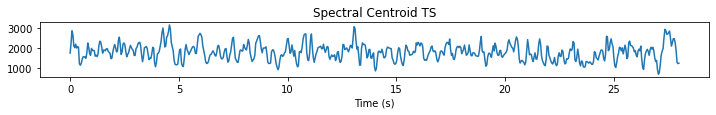

In [5]:
plt.figure(figsize=(12,1))
plt.title('Spectral Centroid TS')
e_time = np.arange(len(df.iloc[0,:]))*512/12000
plt.plot(e_time, df.iloc[0,:].T)
plt.xlabel('Time (s)')

In [6]:
tracks = utils.load("/Users/samuele/University/2.DM2/fma_metadata/tracks.csv")
gen = tracks['track'][['genre_top']]

In [7]:
# attach genre
df = df.merge(gen, on='track_id')
df.tail()

,0,1,2,3,4,5,6,7,8,9,...,648,649,650,651,652,653,654,655,656,genre_top
track_id,,,,,,,,,,,,,,,,,,,,,
154306,1003.026523,1060.208594,1165.510394,1179.937534,1204.848490,1252.097967,1154.869517,938.220839,811.355138,968.914624,...,1019.704869,2249.360096,2417.350937,1462.395646,1664.332195,1627.166890,1274.359577,904.175881,917.400646,Hip-Hop
154307,1389.081601,1476.434972,1989.613482,2258.816403,2213.772148,2161.237663,1987.111802,1803.076069,1539.833243,1490.865631,...,1018.798514,1061.618868,1580.018220,1458.533338,1351.361106,1130.993051,909.549607,792.021082,900.392587,Hip-Hop
154308,665.567942,716.365239,1036.156199,1431.745363,1327.167596,1048.410409,988.375072,1043.613161,1984.277615,2569.823007,...,1901.681854,1549.024471,1128.349759,929.950885,1035.015037,1106.636831,1066.027888,1001.891145,943.325111,Hip-Hop
154309,717.050676,752.278850,803.469385,1149.415580,805.440971,683.443566,603.302748,619.912346,531.146396,599.359124,...,1215.835703,834.969547,730.578309,701.202573,836.654041,914.604459,990.684256,1039.761461,1127.489747,Hip-Hop
155066,385.597241,411.294246,486.856674,461.021433,402.391416,412.240800,452.400098,538.284713,492.903513,388.369454,...,468.012038,449.404910,493.352974,510.541017,442.913255,425.077423,430.989387,615.645717,905.858597,Hip-Hop


In [8]:
df['genre_top'] = df['genre_top'].astype(str)
df['genre_top'].value_counts()

Rock            999
Electronic      999
Experimental    999
Hip-Hop         997
Name: genre_top, dtype: int64

## Amplitude scaling

In [9]:
from tslearn.preprocessing import TimeSeriesScalerMeanVariance

In [10]:
scaler = TimeSeriesScalerMeanVariance(mu=0., std=1.)  # Rescale time series
norm_df = scaler.fit_transform(df.iloc[:,:-1])

In [11]:
norm_df = norm_df.squeeze()

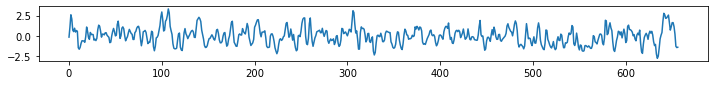

In [12]:
plt.figure(figsize=(12,1))
plt.plot(norm_df[0,:])

In [13]:
norm_df = pd.DataFrame(norm_df, index=df.index)

## Moving average - window = 3

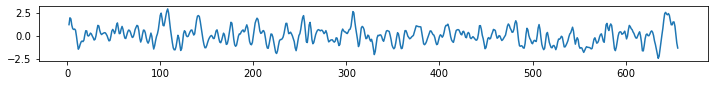

In [14]:
# test
w = 3
ts1 = norm_df.iloc[0,:]
plt.figure(figsize=(12,1))
plt.plot((ts1 - ts1.mean()/ts1.std()).rolling(window=w).mean())

In [15]:
# apply moving average to dataset
w = 3
for i in range(norm_df.shape[0]):
    norm_df.iloc[i,:] = (norm_df.iloc[i,:] - norm_df.iloc[i,:].mean()/norm_df.iloc[i,:].std()).rolling(window=w).mean()

In [16]:
norm_df.dropna(inplace=True, axis=1)

In [17]:
norm_df.head()

,2,3,4,5,6,7,8,9,10,11,...,647,648,649,650,651,652,653,654,655,656
track_id,,,,,,,,,,,,,,,,,,,,,
2,1.189444,1.933395,1.814702,1.125815,0.747099,0.665248,0.709846,0.584026,-0.060399,-0.828887,...,2.207192,1.654036,1.177292,1.171456,1.477312,1.480981,1.015068,0.042869,-0.815182,-1.355974
5,-1.025630,-1.138461,-0.830310,-0.145938,0.550958,0.398888,-0.147250,-0.483644,-0.362152,-0.078099,...,0.530727,0.814710,0.660487,0.260367,0.219257,0.302957,0.649832,0.855678,1.128254,1.221929
148,-1.112911,-0.869556,-0.548359,-0.369083,-0.197297,-0.036975,0.322201,0.792548,1.173474,1.314217,...,0.878110,0.813335,0.794312,0.762646,0.713197,0.649716,0.629669,0.651189,0.680279,0.634803
182,0.970249,1.126305,1.173452,1.028524,1.076873,1.383447,1.820071,1.898354,1.663680,1.105963,...,-0.508307,-0.165692,0.307487,0.822191,1.059849,0.798941,0.467584,0.349262,0.446881,0.539033
255,-0.086795,-0.169704,-0.245989,-0.294283,-0.266821,-0.334596,-0.472530,-0.837053,-1.065860,-1.126315,...,0.022940,-0.559422,-0.896528,-0.822936,-0.390902,0.014458,0.129702,-0.032691,-0.328472,-0.736879


# Approximating Time Series

In [18]:
from tslearn.piecewise import PiecewiseAggregateApproximation
from tslearn.piecewise import SymbolicAggregateApproximation
from tslearn.piecewise import OneD_SymbolicAggregateApproximation

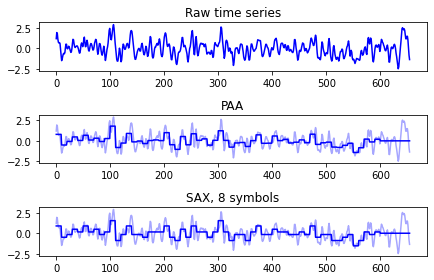

In [19]:
# PAA transform (and inverse transform) of the data
n_paa_segments = 60
paa = PiecewiseAggregateApproximation(n_segments=n_paa_segments)
ts_paa = paa.fit_transform(norm_df)
paa_dataset_inv = paa.inverse_transform(ts_paa)

# SAX transform
n_sax_symbols = 8
sax = SymbolicAggregateApproximation(n_segments=n_paa_segments, alphabet_size_avg=n_sax_symbols)
ts_sax = sax.fit_transform(norm_df)
sax_dataset_inv = sax.inverse_transform(ts_sax)

# PLOTTING FIRST TRACK 
plt.figure()
plt.subplot(3, 1, 1)  # First, raw time series
plt.plot(norm_df.iloc[0,:].ravel(), "b-")
plt.title("Raw time series")

plt.subplot(3, 1, 2)  # Second, PAA
plt.plot(norm_df.iloc[0,:].ravel(), "b-", alpha=0.35)
plt.plot(paa_dataset_inv[0].ravel(), "b-")
plt.title("PAA")

plt.subplot(3, 1, 3)  # Then SAX
plt.plot(norm_df.iloc[0,:].ravel(), "b-", alpha=0.35)
plt.plot(sax_dataset_inv[0].ravel(), "b-")
plt.title("SAX, %d symbols" % n_sax_symbols)



plt.tight_layout()

# Clustering

In [20]:
from tslearn.clustering import TimeSeriesKMeans

from sklearn.metrics import silhouette_score

# SAX (8 symbols) - Euclidean

In [56]:
# SAX transform -- 8 symbols
n_paa_segments = 60
n_sax_symbols = 8
sax = SymbolicAggregateApproximation(n_segments=n_paa_segments, alphabet_size_avg=n_sax_symbols)
ts_sax = sax.fit_transform(norm_df)
ts_sax_inv = sax.inverse_transform(ts_sax)
ts_sax = ts_sax.squeeze()
df_sax = pd.DataFrame(ts_sax, index=df.index)


In [55]:
ts_sax

array([[6, 2, 3, ..., 4, 3, 4],
       [2, 6, 2, ..., 7, 5, 5],
       [4, 5, 7, ..., 6, 6, 5],
       ...,
       [4, 5, 7, ..., 3, 3, 2],
       [1, 3, 7, ..., 7, 4, 4],
       [5, 7, 4, ..., 3, 3, 3]])

In [57]:
ts_sax_inv

array([[[ 0.88714656],
        [ 0.88714656],
        [ 0.88714656],
        ...,
        [ 0.        ],
        [ 0.        ],
        [ 0.        ]],

       [[-0.48877641],
        [-0.48877641],
        [-0.48877641],
        ...,
        [ 0.        ],
        [ 0.        ],
        [ 0.        ]],

       [[ 0.15731068],
        [ 0.15731068],
        [ 0.15731068],
        ...,
        [ 0.        ],
        [ 0.        ],
        [ 0.        ]],

       ...,

       [[ 0.15731068],
        [ 0.15731068],
        [ 0.15731068],
        ...,
        [ 0.        ],
        [ 0.        ],
        [ 0.        ]],

       [[-0.88714656],
        [-0.88714656],
        [-0.88714656],
        ...,
        [ 0.        ],
        [ 0.        ],
        [ 0.        ]],

       [[ 0.48877641],
        [ 0.48877641],
        [ 0.48877641],
        ...,
        [ 0.        ],
        [ 0.        ],
        [ 0.        ]]])

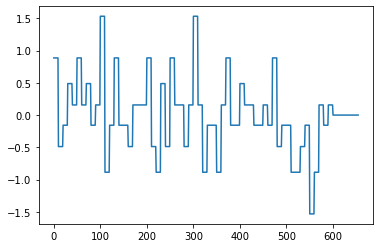

In [58]:
plt.plot(ts_sax_inv[0])
plt.show()

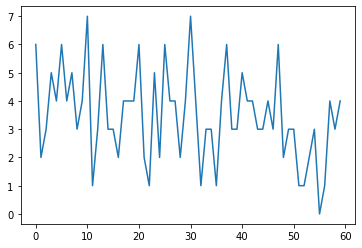

In [59]:
plt.plot(ts_sax[0])
plt.show()

In [23]:
# computing optimal number of clusters
sse_sax=[]
sil_sax=[]

max_k=30
for k in tqdm(range(2, max_k+1)):
    kmeans = TimeSeriesKMeans(n_clusters=k, metric='euclidean', max_iter=20, random_state=42, n_jobs=-1)
    kmeans.fit(df_sax)
    sil = silhouette_score(df_sax, kmeans.labels_)
    sse = kmeans.inertia_
    sil_sax.append(sil)
    sse_sax.append(sse)   

100%|██████████| 29/29 [00:42<00:00,  1.48s/it]


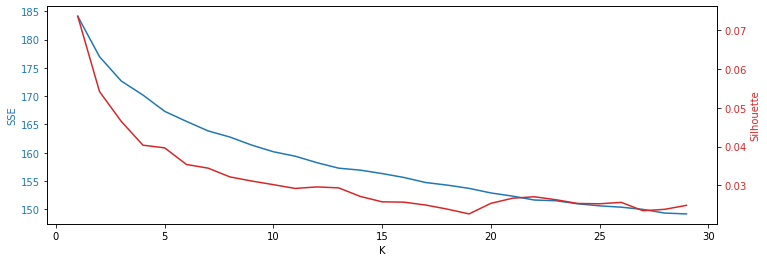

In [24]:
fig, ax1 = plt.subplots(figsize=(12,4))
t = np.arange(1,30,1)
color='tab:blue'
ax1.set_ylabel("SSE", color=color)
ax1.set_xlabel('K')
ax1.plot(t, sse_sax, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx() #share the same x-axis

color = 'tab:red'
ax2.set_ylabel('Silhouette', color=color)
ax2.plot(t, sil_sax, color=color)
ax2.tick_params(axis='y', labelcolor=color)

In [25]:
km = TimeSeriesKMeans(n_clusters=4, metric="euclidean", max_iter=100, random_state=42)
km.fit(df_sax)

TimeSeriesKMeans(max_iter=100, n_clusters=4, random_state=42)

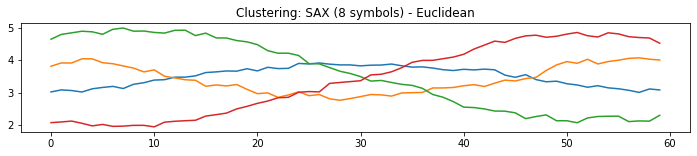

In [26]:
plt.figure(figsize=(12,2))
plt.title('Clustering: SAX (8 symbols) - Euclidean')
plt.plot(np.squeeze(km.cluster_centers_).T)
plt.show()

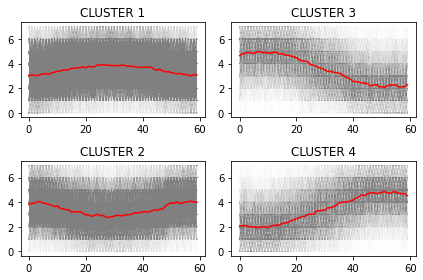

<Figure size 360x72 with 0 Axes>

<Figure size 360x72 with 0 Axes>

<Figure size 360x72 with 0 Axes>

<Figure size 360x72 with 0 Axes>

In [27]:
fig, ax = plt.subplots(2, 2)

plt.figure(figsize=(5,1))
ax[0, 0].set_title('CLUSTER 1')
ax[0, 0].plot(np.squeeze(df_sax[km.labels_ == 0]).T,color='black', alpha=0.2)
ax[0, 0].plot(np.squeeze(km.cluster_centers_[0]).T, color='yellow')
#plt.ylim(-0.3,0.3)

plt.figure(figsize=(5,1))
ax[1, 0].set_title('CLUSTER 2')
ax[1, 0].plot(np.squeeze(df_sax[km.labels_ == 1]).T,color='black', alpha=0.2)
ax[1, 0].plot(np.squeeze(km.cluster_centers_[1]).T, color='yellow')

#plt.ylim(-0.3,0.3)

plt.figure(figsize=(5,1))
ax[0, 1].set_title('CLUSTER 3')
ax[0, 1].plot(np.squeeze(df_sax[km.labels_ == 2]).T,color='black', alpha=0.2)
ax[0, 1].plot(np.squeeze(km.cluster_centers_[2]).T, color='yellow')
#plt.ylim(-0.3,0.3)

plt.figure(figsize=(5,1))
ax[1, 1].set_title('CLUSTER 4')
ax[1, 1].plot(np.squeeze(df_sax[km.labels_ == 3]).T,color='black', alpha=0.2)
ax[1, 1].plot(np.squeeze(km.cluster_centers_[3]).T, color='yellow')
#plt.ylim(-0.3,0.3)

fig.tight_layout()
plt.show()


In [28]:
for i in range(4):
    print("Cluster {}: {}".format(i, sum(km.labels_ == i)))

Cluster 0: 1590
Cluster 1: 1093
Cluster 2: 645
Cluster 3: 666


In [29]:
print('SSE:',km.inertia_,"\nSilouhette:",silhouette_score(df_sax, km.labels_))

SSE: 172.65908527603474 
Silouhette: 0.04682380395257537


In [30]:
for i in range(4):
    print('Cluster',i,'\n\n',df[km.labels_ == i]['genre_top'].value_counts(normalize=True),'\n\n')

Cluster 0 

 Hip-Hop         0.316352
Electronic      0.257862
Experimental    0.223270
Rock            0.202516
Name: genre_top, dtype: float64 


Cluster 1 

 Hip-Hop         0.274474
Experimental    0.251601
Rock            0.242452
Electronic      0.231473
Name: genre_top, dtype: float64 


Cluster 2 

 Experimental    0.294574
Rock            0.277519
Electronic      0.272868
Hip-Hop         0.155039
Name: genre_top, dtype: float64 


Cluster 3 

 Rock            0.349850
Experimental    0.268769
Electronic      0.240240
Hip-Hop         0.141141
Name: genre_top, dtype: float64 




# SAX (8 symbols) - DTW (soft)

In [29]:
df_sax.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3994 entries, 2 to 155066
Data columns (total 60 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       3994 non-null   int64
 1   1       3994 non-null   int64
 2   2       3994 non-null   int64
 3   3       3994 non-null   int64
 4   4       3994 non-null   int64
 5   5       3994 non-null   int64
 6   6       3994 non-null   int64
 7   7       3994 non-null   int64
 8   8       3994 non-null   int64
 9   9       3994 non-null   int64
 10  10      3994 non-null   int64
 11  11      3994 non-null   int64
 12  12      3994 non-null   int64
 13  13      3994 non-null   int64
 14  14      3994 non-null   int64
 15  15      3994 non-null   int64
 16  16      3994 non-null   int64
 17  17      3994 non-null   int64
 18  18      3994 non-null   int64
 19  19      3994 non-null   int64
 20  20      3994 non-null   int64
 21  21      3994 non-null   int64
 22  22      3994 non-null   int64
 23  23      399

Cannot run DTW due to a **Numba** bug: TypeError: expected dtype object, got 'numpy.dtype[float64]'

In [30]:
km = TimeSeriesKMeans(n_clusters=4, metric="softdtw", metric_params= {"gamma": .01}, max_iter=5, random_state=42, verbose=True)
km.fit(df_sax)

7358.254 --> 4472.651 --> 4219.085 --> 4094.996 --> 4029.317 --> 


TimeSeriesKMeans(max_iter=5, metric='softdtw', metric_params={'gamma': 0.01},
                 n_clusters=4, random_state=42, verbose=True)

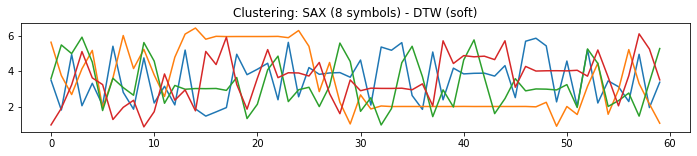

In [31]:
plt.figure(figsize=(12,2))
plt.title('Clustering: SAX (8 symbols) - DTW (soft)')
plt.plot(np.squeeze(km.cluster_centers_).T)
plt.show()

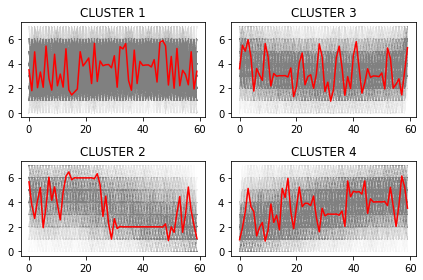

<Figure size 360x72 with 0 Axes>

<Figure size 360x72 with 0 Axes>

<Figure size 360x72 with 0 Axes>

<Figure size 360x72 with 0 Axes>

In [32]:
fig, ax = plt.subplots(2, 2)

plt.figure(figsize=(5,1))
ax[0, 0].set_title('CLUSTER 1')
ax[0, 0].plot(np.squeeze(df_sax[km.labels_ == 0]).T,color='black', alpha=0.2)
ax[0, 0].plot(np.squeeze(km.cluster_centers_[0]).T, color='yellow')
#plt.ylim(-0.3,0.3)

plt.figure(figsize=(5,1))
ax[1, 0].set_title('CLUSTER 2')
ax[1, 0].plot(np.squeeze(df_sax[km.labels_ == 1]).T,color='black', alpha=0.2)
ax[1, 0].plot(np.squeeze(km.cluster_centers_[1]).T, color='yellow')

#plt.ylim(-0.3,0.3)

plt.figure(figsize=(5,1))
ax[0, 1].set_title('CLUSTER 3')
ax[0, 1].plot(np.squeeze(df_sax[km.labels_ == 2]).T,color='black', alpha=0.2)
ax[0, 1].plot(np.squeeze(km.cluster_centers_[2]).T, color='yellow')
#plt.ylim(-0.3,0.3)

plt.figure(figsize=(5,1))
ax[1, 1].set_title('CLUSTER 4')
ax[1, 1].plot(np.squeeze(df_sax[km.labels_ == 3]).T,color='black', alpha=0.2)
ax[1, 1].plot(np.squeeze(km.cluster_centers_[3]).T, color='yellow')
#plt.ylim(-0.3,0.3)

fig.tight_layout()
plt.show()

In [33]:
for i in range(4):
    print("Cluster {}: {}".format(i, sum(km.labels_ == i)))

Cluster 0: 1401
Cluster 1: 797
Cluster 2: 852
Cluster 3: 944


In [34]:
print('SSE:',km.inertia_,"\nSilouhette:",silhouette_score(df_sax, km.labels_))

SSE: 4029.3173099366713 
Silouhette: 0.013742150219531051


In [35]:
for i in range(4):
    print('Cluster',i,'\n\n',df[km.labels_ == i]['genre_top'].value_counts(normalize=True),'\n\n')

Cluster 0 

 Hip-Hop         0.450393
Electronic      0.246253
Experimental    0.174875
Rock            0.128480
Name: genre_top, dtype: float64 


Cluster 1 

 Experimental    0.318695
Rock            0.299875
Electronic      0.253450
Hip-Hop         0.127980
Name: genre_top, dtype: float64 


Cluster 2 

 Rock            0.295775
Experimental    0.260563
Electronic      0.248826
Hip-Hop         0.194836
Name: genre_top, dtype: float64 


Cluster 3 

 Rock            0.347458
Experimental    0.294492
Electronic      0.254237
Hip-Hop         0.103814
Name: genre_top, dtype: float64 




**Soft DTW** has better performances in clustering Hip-Hop songs. As we can see from cluster's composition, cluster 0 contains 45% of Hip-Hop songs in it.<br> Using Euclidean distance the cluster with the highest number of Hip-Hop songs had percentage of 31.6%.

# SAX - DTW

In [34]:
help(TimeSeriesKMeans)

Help on class TimeSeriesKMeans in module tslearn.clustering.kmeans:

class TimeSeriesKMeans(sklearn.base.TransformerMixin, sklearn.base.ClusterMixin, tslearn.clustering.utils.TimeSeriesCentroidBasedClusteringMixin, tslearn.bases.bases.BaseModelPackage, tslearn.bases.bases.TimeSeriesBaseEstimator)
 |  TimeSeriesKMeans(n_clusters=3, max_iter=50, tol=1e-06, n_init=1, metric='euclidean', max_iter_barycenter=100, metric_params=None, n_jobs=None, dtw_inertia=False, verbose=0, random_state=None, init='k-means++')
 |  
 |  K-means clustering for time-series data.
 |  
 |  Parameters
 |  ----------
 |  n_clusters : int (default: 3)
 |      Number of clusters to form.
 |  
 |  max_iter : int (default: 50)
 |      Maximum number of iterations of the k-means algorithm for a single run.
 |  
 |  tol : float (default: 1e-6)
 |      Inertia variation threshold. If at some point, inertia varies less than
 |      this threshold between two consecutive
 |      iterations, the model is considered to have

In [53]:
km = TimeSeriesKMeans(n_clusters=4, metric="dtw", max_iter=100, random_state=42, verbose=True, n_jobs=6)
km.fit(df_sax)

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 1238 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 1788 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 2438 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 3188 tasks      | elapsed:    0.3s
[Parallel(n_jobs=6)]: Done 3994 out of 3994 | elapsed:    0.4s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 1238 

82.713 --> 

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 1238 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 1788 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 2438 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 3188 tasks      | elapsed:    0.3s
[Parallel(n_jobs=6)]: Done 4038 tasks      | elapsed:    0.4s
[Parallel(n_jobs=6)]: Done 4988 tasks      | elapsed:    0.5s
[Parallel(n_jobs=6)]: Done 6038 tasks      | elapsed:    0.6s
[Parallel(n_jobs=6)]: Done 7188 tasks      | elapsed:    0.7s
[Parallel(n_jobs=6)]: Done 8438 tasks      | elapsed:    0.8s
[Parallel(n_jobs=6)]: Done 9788 tasks      | elapsed:    0.9s
[Parallel(n_jobs=6)]: Done 11238 tasks      | elapsed:  

63.882 --> 

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 1238 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 1788 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 2438 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 3188 tasks      | elapsed:    0.3s
[Parallel(n_jobs=6)]: Done 4038 tasks      | elapsed:    0.4s
[Parallel(n_jobs=6)]: Done 4988 tasks      | elapsed:    0.5s
[Parallel(n_jobs=6)]: Done 6038 tasks      | elapsed:    0.6s
[Parallel(n_jobs=6)]: Done 7188 tasks      | elapsed:    0.7s
[Parallel(n_jobs=6)]: Done 8438 tasks      | elapsed:    0.8s
[Parallel(n_jobs=6)]: Done 9788 tasks      | elapsed:    0.9s
[Parallel(n_jobs=6)]: Done 11238 tasks      | elapsed:  

62.595 --> 

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 1238 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 1788 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 2438 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 3188 tasks      | elapsed:    0.3s
[Parallel(n_jobs=6)]: Done 4038 tasks      | elapsed:    0.4s
[Parallel(n_jobs=6)]: Done 4988 tasks      | elapsed:    0.5s
[Parallel(n_jobs=6)]: Done 6038 tasks      | elapsed:    0.6s
[Parallel(n_jobs=6)]: Done 7188 tasks      | elapsed:    0.7s
[Parallel(n_jobs=6)]: Done 8438 tasks      | elapsed:    0.8s
[Parallel(n_jobs=6)]: Done 9788 tasks      | elapsed:    0.9s
[Parallel(n_jobs=6)]: Done 11238 tasks      | elapsed:  

62.220 --> 

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 1238 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 1788 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 2438 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 3188 tasks      | elapsed:    0.3s
[Parallel(n_jobs=6)]: Done 4038 tasks      | elapsed:    0.4s
[Parallel(n_jobs=6)]: Done 4988 tasks      | elapsed:    0.5s
[Parallel(n_jobs=6)]: Done 6038 tasks      | elapsed:    0.6s
[Parallel(n_jobs=6)]: Done 7188 tasks      | elapsed:    0.7s
[Parallel(n_jobs=6)]: Done 8438 tasks      | elapsed:    0.8s
[Parallel(n_jobs=6)]: Done 9788 tasks      | elapsed:    0.9s
[Parallel(n_jobs=6)]: Done 11238 tasks      | elapsed:  

62.044 --> 

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 1238 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 1788 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 2438 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 3188 tasks      | elapsed:    0.3s
[Parallel(n_jobs=6)]: Done 4038 tasks      | elapsed:    0.4s
[Parallel(n_jobs=6)]: Done 4988 tasks      | elapsed:    0.5s
[Parallel(n_jobs=6)]: Done 6038 tasks      | elapsed:    0.6s
[Parallel(n_jobs=6)]: Done 7188 tasks      | elapsed:    0.7s
[Parallel(n_jobs=6)]: Done 8438 tasks      | elapsed:    0.8s
[Parallel(n_jobs=6)]: Done 9788 tasks      | elapsed:    0.9s
[Parallel(n_jobs=6)]: Done 11238 tasks      | elapsed:  

61.888 --> 

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 1238 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 1788 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 2438 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 3188 tasks      | elapsed:    0.3s
[Parallel(n_jobs=6)]: Done 4038 tasks      | elapsed:    0.4s
[Parallel(n_jobs=6)]: Done 4988 tasks      | elapsed:    0.5s
[Parallel(n_jobs=6)]: Done 6038 tasks      | elapsed:    0.6s
[Parallel(n_jobs=6)]: Done 7188 tasks      | elapsed:    0.7s
[Parallel(n_jobs=6)]: Done 8438 tasks      | elapsed:    0.8s
[Parallel(n_jobs=6)]: Done 9788 tasks      | elapsed:    0.9s
[Parallel(n_jobs=6)]: Done 11238 tasks      | elapsed:  

61.792 --> 

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 1238 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 1788 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 2438 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 3188 tasks      | elapsed:    0.3s
[Parallel(n_jobs=6)]: Done 4038 tasks      | elapsed:    0.4s
[Parallel(n_jobs=6)]: Done 4988 tasks      | elapsed:    0.5s
[Parallel(n_jobs=6)]: Done 6038 tasks      | elapsed:    0.6s
[Parallel(n_jobs=6)]: Done 7188 tasks      | elapsed:    0.7s
[Parallel(n_jobs=6)]: Done 8438 tasks      | elapsed:    0.8s
[Parallel(n_jobs=6)]: Done 9788 tasks      | elapsed:    0.9s
[Parallel(n_jobs=6)]: Done 11238 tasks      | elapsed:  

61.684 --> 

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 1238 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 1788 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 2438 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 3188 tasks      | elapsed:    0.3s
[Parallel(n_jobs=6)]: Done 4038 tasks      | elapsed:    0.4s
[Parallel(n_jobs=6)]: Done 4988 tasks      | elapsed:    0.5s
[Parallel(n_jobs=6)]: Done 6038 tasks      | elapsed:    0.6s
[Parallel(n_jobs=6)]: Done 7188 tasks      | elapsed:    0.7s
[Parallel(n_jobs=6)]: Done 8438 tasks      | elapsed:    0.8s
[Parallel(n_jobs=6)]: Done 9788 tasks      | elapsed:    0.9s
[Parallel(n_jobs=6)]: Done 11238 tasks      | elapsed:  

61.626 --> 

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 1238 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 1788 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 2438 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 3188 tasks      | elapsed:    0.3s
[Parallel(n_jobs=6)]: Done 4038 tasks      | elapsed:    0.4s
[Parallel(n_jobs=6)]: Done 4988 tasks      | elapsed:    0.5s
[Parallel(n_jobs=6)]: Done 6038 tasks      | elapsed:    0.6s
[Parallel(n_jobs=6)]: Done 7188 tasks      | elapsed:    0.7s
[Parallel(n_jobs=6)]: Done 8438 tasks      | elapsed:    0.8s
[Parallel(n_jobs=6)]: Done 9788 tasks      | elapsed:    0.9s
[Parallel(n_jobs=6)]: Done 11238 tasks      | elapsed:  

61.608 --> 

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 1238 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 1788 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 2438 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 3188 tasks      | elapsed:    0.3s
[Parallel(n_jobs=6)]: Done 4038 tasks      | elapsed:    0.4s
[Parallel(n_jobs=6)]: Done 4988 tasks      | elapsed:    0.5s
[Parallel(n_jobs=6)]: Done 6038 tasks      | elapsed:    0.6s
[Parallel(n_jobs=6)]: Done 7188 tasks      | elapsed:    0.7s
[Parallel(n_jobs=6)]: Done 8438 tasks      | elapsed:    0.8s
[Parallel(n_jobs=6)]: Done 9788 tasks      | elapsed:    0.9s
[Parallel(n_jobs=6)]: Done 11238 tasks      | elapsed:  

61.600 --> 

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 1238 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 1788 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 2438 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 3188 tasks      | elapsed:    0.3s
[Parallel(n_jobs=6)]: Done 4038 tasks      | elapsed:    0.4s
[Parallel(n_jobs=6)]: Done 4988 tasks      | elapsed:    0.5s
[Parallel(n_jobs=6)]: Done 6038 tasks      | elapsed:    0.5s
[Parallel(n_jobs=6)]: Done 7188 tasks      | elapsed:    0.6s
[Parallel(n_jobs=6)]: Done 8438 tasks      | elapsed:    0.7s
[Parallel(n_jobs=6)]: Done 9788 tasks      | elapsed:    0.9s
[Parallel(n_jobs=6)]: Done 11238 tasks      | elapsed:  

61.594 --> 

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 1238 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 1788 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 2438 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 3188 tasks      | elapsed:    0.3s
[Parallel(n_jobs=6)]: Done 4038 tasks      | elapsed:    0.4s
[Parallel(n_jobs=6)]: Done 4988 tasks      | elapsed:    0.5s
[Parallel(n_jobs=6)]: Done 6038 tasks      | elapsed:    0.6s
[Parallel(n_jobs=6)]: Done 7188 tasks      | elapsed:    0.7s
[Parallel(n_jobs=6)]: Done 8438 tasks      | elapsed:    0.8s
[Parallel(n_jobs=6)]: Done 9788 tasks      | elapsed:    0.9s
[Parallel(n_jobs=6)]: Done 11238 tasks      | elapsed:  

61.558 --> 

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 1238 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 1788 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 2438 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 3188 tasks      | elapsed:    0.3s
[Parallel(n_jobs=6)]: Done 4038 tasks      | elapsed:    0.4s
[Parallel(n_jobs=6)]: Done 4988 tasks      | elapsed:    0.4s
[Parallel(n_jobs=6)]: Done 6038 tasks      | elapsed:    0.5s
[Parallel(n_jobs=6)]: Done 7188 tasks      | elapsed:    0.6s
[Parallel(n_jobs=6)]: Done 8438 tasks      | elapsed:    0.8s
[Parallel(n_jobs=6)]: Done 9788 tasks      | elapsed:    0.9s
[Parallel(n_jobs=6)]: Done 11238 tasks      | elapsed:  

61.552 --> 

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 1238 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 1788 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 2438 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 3188 tasks      | elapsed:    0.3s
[Parallel(n_jobs=6)]: Done 4038 tasks      | elapsed:    0.4s
[Parallel(n_jobs=6)]: Done 4988 tasks      | elapsed:    0.5s
[Parallel(n_jobs=6)]: Done 6038 tasks      | elapsed:    0.6s
[Parallel(n_jobs=6)]: Done 7188 tasks      | elapsed:    0.7s
[Parallel(n_jobs=6)]: Done 8438 tasks      | elapsed:    0.8s
[Parallel(n_jobs=6)]: Done 9788 tasks      | elapsed:    0.9s
[Parallel(n_jobs=6)]: Done 11238 tasks      | elapsed:  

61.545 --> 

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 1238 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 1788 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 2438 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 3188 tasks      | elapsed:    0.3s
[Parallel(n_jobs=6)]: Done 4038 tasks      | elapsed:    0.4s
[Parallel(n_jobs=6)]: Done 4988 tasks      | elapsed:    0.5s
[Parallel(n_jobs=6)]: Done 6038 tasks      | elapsed:    0.6s
[Parallel(n_jobs=6)]: Done 7188 tasks      | elapsed:    0.7s
[Parallel(n_jobs=6)]: Done 8438 tasks      | elapsed:    0.8s
[Parallel(n_jobs=6)]: Done 9788 tasks      | elapsed:    0.9s
[Parallel(n_jobs=6)]: Done 11238 tasks      | elapsed:  

61.542 --> 

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 1238 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 1788 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 2438 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 3188 tasks      | elapsed:    0.3s
[Parallel(n_jobs=6)]: Done 4038 tasks      | elapsed:    0.4s
[Parallel(n_jobs=6)]: Done 4988 tasks      | elapsed:    0.5s
[Parallel(n_jobs=6)]: Done 6038 tasks      | elapsed:    0.6s
[Parallel(n_jobs=6)]: Done 7188 tasks      | elapsed:    0.7s
[Parallel(n_jobs=6)]: Done 8438 tasks      | elapsed:    0.8s
[Parallel(n_jobs=6)]: Done 9788 tasks      | elapsed:    0.9s
[Parallel(n_jobs=6)]: Done 11238 tasks      | elapsed:  

61.480 --> 

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 1238 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 1788 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 2438 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 3188 tasks      | elapsed:    0.3s
[Parallel(n_jobs=6)]: Done 4038 tasks      | elapsed:    0.4s
[Parallel(n_jobs=6)]: Done 4988 tasks      | elapsed:    0.5s
[Parallel(n_jobs=6)]: Done 6038 tasks      | elapsed:    0.6s
[Parallel(n_jobs=6)]: Done 7188 tasks      | elapsed:    0.7s
[Parallel(n_jobs=6)]: Done 8438 tasks      | elapsed:    0.8s
[Parallel(n_jobs=6)]: Done 9788 tasks      | elapsed:    0.9s
[Parallel(n_jobs=6)]: Done 11238 tasks      | elapsed:  

60.808 --> 

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 1238 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 1788 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 2438 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 3188 tasks      | elapsed:    0.3s
[Parallel(n_jobs=6)]: Done 4038 tasks      | elapsed:    0.4s
[Parallel(n_jobs=6)]: Done 4988 tasks      | elapsed:    0.5s
[Parallel(n_jobs=6)]: Done 6038 tasks      | elapsed:    0.6s
[Parallel(n_jobs=6)]: Done 7188 tasks      | elapsed:    0.7s
[Parallel(n_jobs=6)]: Done 8438 tasks      | elapsed:    0.8s
[Parallel(n_jobs=6)]: Done 9788 tasks      | elapsed:    0.9s
[Parallel(n_jobs=6)]: Done 11238 tasks      | elapsed:  

60.788 --> 

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 1238 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 1788 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 2438 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 3188 tasks      | elapsed:    0.3s
[Parallel(n_jobs=6)]: Done 4038 tasks      | elapsed:    0.4s
[Parallel(n_jobs=6)]: Done 4988 tasks      | elapsed:    0.5s
[Parallel(n_jobs=6)]: Done 6038 tasks      | elapsed:    0.6s
[Parallel(n_jobs=6)]: Done 7188 tasks      | elapsed:    0.7s
[Parallel(n_jobs=6)]: Done 8438 tasks      | elapsed:    0.8s
[Parallel(n_jobs=6)]: Done 9788 tasks      | elapsed:    0.9s
[Parallel(n_jobs=6)]: Done 11238 tasks      | elapsed:  

60.767 --> 

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 1238 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 1788 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 2438 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 3188 tasks      | elapsed:    0.3s
[Parallel(n_jobs=6)]: Done 4038 tasks      | elapsed:    0.4s
[Parallel(n_jobs=6)]: Done 4988 tasks      | elapsed:    0.5s
[Parallel(n_jobs=6)]: Done 6038 tasks      | elapsed:    0.6s
[Parallel(n_jobs=6)]: Done 7188 tasks      | elapsed:    0.7s
[Parallel(n_jobs=6)]: Done 8438 tasks      | elapsed:    0.8s
[Parallel(n_jobs=6)]: Done 9788 tasks      | elapsed:    0.9s
[Parallel(n_jobs=6)]: Done 11238 tasks      | elapsed:  

60.759 --> 

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 1238 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 1788 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 2438 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 3188 tasks      | elapsed:    0.3s
[Parallel(n_jobs=6)]: Done 4038 tasks      | elapsed:    0.4s
[Parallel(n_jobs=6)]: Done 4988 tasks      | elapsed:    0.5s
[Parallel(n_jobs=6)]: Done 6038 tasks      | elapsed:    0.6s
[Parallel(n_jobs=6)]: Done 7188 tasks      | elapsed:    0.7s
[Parallel(n_jobs=6)]: Done 8438 tasks      | elapsed:    0.8s
[Parallel(n_jobs=6)]: Done 9788 tasks      | elapsed:    0.9s
[Parallel(n_jobs=6)]: Done 11238 tasks      | elapsed:  

60.755 --> 

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 1238 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 1788 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 2438 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 3188 tasks      | elapsed:    0.3s
[Parallel(n_jobs=6)]: Done 4038 tasks      | elapsed:    0.4s
[Parallel(n_jobs=6)]: Done 4988 tasks      | elapsed:    0.5s
[Parallel(n_jobs=6)]: Done 6038 tasks      | elapsed:    0.6s
[Parallel(n_jobs=6)]: Done 7188 tasks      | elapsed:    0.7s
[Parallel(n_jobs=6)]: Done 8438 tasks      | elapsed:    0.8s
[Parallel(n_jobs=6)]: Done 9788 tasks      | elapsed:    0.9s
[Parallel(n_jobs=6)]: Done 11238 tasks      | elapsed:  

60.749 --> 

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 1238 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 1788 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 2438 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 3188 tasks      | elapsed:    0.3s
[Parallel(n_jobs=6)]: Done 4038 tasks      | elapsed:    0.4s
[Parallel(n_jobs=6)]: Done 4988 tasks      | elapsed:    0.5s
[Parallel(n_jobs=6)]: Done 6038 tasks      | elapsed:    0.6s
[Parallel(n_jobs=6)]: Done 7188 tasks      | elapsed:    0.7s
[Parallel(n_jobs=6)]: Done 8438 tasks      | elapsed:    0.8s
[Parallel(n_jobs=6)]: Done 9788 tasks      | elapsed:    0.9s
[Parallel(n_jobs=6)]: Done 11238 tasks      | elapsed:  

60.740 --> 

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 1238 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 1788 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 2438 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 3188 tasks      | elapsed:    0.3s
[Parallel(n_jobs=6)]: Done 4038 tasks      | elapsed:    0.4s
[Parallel(n_jobs=6)]: Done 4988 tasks      | elapsed:    0.5s
[Parallel(n_jobs=6)]: Done 6038 tasks      | elapsed:    0.6s
[Parallel(n_jobs=6)]: Done 7188 tasks      | elapsed:    0.7s
[Parallel(n_jobs=6)]: Done 8438 tasks      | elapsed:    0.8s
[Parallel(n_jobs=6)]: Done 9788 tasks      | elapsed:    0.9s
[Parallel(n_jobs=6)]: Done 11238 tasks      | elapsed:  

60.695 --> 

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 1238 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 1788 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 2438 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 3188 tasks      | elapsed:    0.3s
[Parallel(n_jobs=6)]: Done 4038 tasks      | elapsed:    0.4s
[Parallel(n_jobs=6)]: Done 4988 tasks      | elapsed:    0.5s
[Parallel(n_jobs=6)]: Done 6038 tasks      | elapsed:    0.6s
[Parallel(n_jobs=6)]: Done 7188 tasks      | elapsed:    0.7s
[Parallel(n_jobs=6)]: Done 8438 tasks      | elapsed:    0.8s
[Parallel(n_jobs=6)]: Done 9788 tasks      | elapsed:    0.9s
[Parallel(n_jobs=6)]: Done 11238 tasks      | elapsed:  

60.691 --> 

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 1238 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 1788 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 2438 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 3188 tasks      | elapsed:    0.3s
[Parallel(n_jobs=6)]: Done 4038 tasks      | elapsed:    0.4s
[Parallel(n_jobs=6)]: Done 4988 tasks      | elapsed:    0.5s
[Parallel(n_jobs=6)]: Done 6038 tasks      | elapsed:    0.6s
[Parallel(n_jobs=6)]: Done 7188 tasks      | elapsed:    0.7s
[Parallel(n_jobs=6)]: Done 8438 tasks      | elapsed:    0.8s
[Parallel(n_jobs=6)]: Done 9788 tasks      | elapsed:    0.9s
[Parallel(n_jobs=6)]: Done 11238 tasks      | elapsed:  

60.691 --> 

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 1238 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 1788 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 2438 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 3188 tasks      | elapsed:    0.3s
[Parallel(n_jobs=6)]: Done 4038 tasks      | elapsed:    0.4s
[Parallel(n_jobs=6)]: Done 4988 tasks      | elapsed:    0.5s
[Parallel(n_jobs=6)]: Done 6038 tasks      | elapsed:    0.6s
[Parallel(n_jobs=6)]: Done 7188 tasks      | elapsed:    0.7s
[Parallel(n_jobs=6)]: Done 8438 tasks      | elapsed:    0.8s
[Parallel(n_jobs=6)]: Done 9788 tasks      | elapsed:    0.9s
[Parallel(n_jobs=6)]: Done 11238 tasks      | elapsed:  

60.691 --> 

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 1238 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 1788 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 2438 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 3188 tasks      | elapsed:    0.3s
[Parallel(n_jobs=6)]: Done 4038 tasks      | elapsed:    0.4s
[Parallel(n_jobs=6)]: Done 4988 tasks      | elapsed:    0.5s
[Parallel(n_jobs=6)]: Done 6038 tasks      | elapsed:    0.6s
[Parallel(n_jobs=6)]: Done 7188 tasks      | elapsed:    0.7s
[Parallel(n_jobs=6)]: Done 8438 tasks      | elapsed:    0.8s
[Parallel(n_jobs=6)]: Done 9788 tasks      | elapsed:    0.9s
[Parallel(n_jobs=6)]: Done 11238 tasks      | elapsed:  

60.690 --> 

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 1238 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 1788 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 2438 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 3188 tasks      | elapsed:    0.3s
[Parallel(n_jobs=6)]: Done 4038 tasks      | elapsed:    0.4s
[Parallel(n_jobs=6)]: Done 4988 tasks      | elapsed:    0.5s
[Parallel(n_jobs=6)]: Done 6038 tasks      | elapsed:    0.6s
[Parallel(n_jobs=6)]: Done 7188 tasks      | elapsed:    0.7s
[Parallel(n_jobs=6)]: Done 8438 tasks      | elapsed:    0.8s
[Parallel(n_jobs=6)]: Done 9788 tasks      | elapsed:    0.9s
[Parallel(n_jobs=6)]: Done 11238 tasks      | elapsed:  

60.690 --> 

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 1238 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 1788 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 2438 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 3188 tasks      | elapsed:    0.3s
[Parallel(n_jobs=6)]: Done 4038 tasks      | elapsed:    0.4s
[Parallel(n_jobs=6)]: Done 4988 tasks      | elapsed:    0.5s
[Parallel(n_jobs=6)]: Done 6038 tasks      | elapsed:    0.6s
[Parallel(n_jobs=6)]: Done 7188 tasks      | elapsed:    0.7s
[Parallel(n_jobs=6)]: Done 8438 tasks      | elapsed:    0.8s
[Parallel(n_jobs=6)]: Done 9788 tasks      | elapsed:    0.9s
[Parallel(n_jobs=6)]: Done 11238 tasks      | elapsed:  

60.675 --> 

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 1238 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 1788 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 2438 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 3188 tasks      | elapsed:    0.3s
[Parallel(n_jobs=6)]: Done 4038 tasks      | elapsed:    0.4s
[Parallel(n_jobs=6)]: Done 4988 tasks      | elapsed:    0.5s
[Parallel(n_jobs=6)]: Done 6038 tasks      | elapsed:    0.6s
[Parallel(n_jobs=6)]: Done 7188 tasks      | elapsed:    0.7s
[Parallel(n_jobs=6)]: Done 8438 tasks      | elapsed:    0.8s
[Parallel(n_jobs=6)]: Done 9788 tasks      | elapsed:    0.9s
[Parallel(n_jobs=6)]: Done 11238 tasks      | elapsed:  

60.672 --> 

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 1238 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 1788 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 2438 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 3188 tasks      | elapsed:    0.3s
[Parallel(n_jobs=6)]: Done 4038 tasks      | elapsed:    0.4s
[Parallel(n_jobs=6)]: Done 4988 tasks      | elapsed:    0.5s
[Parallel(n_jobs=6)]: Done 6038 tasks      | elapsed:    0.6s
[Parallel(n_jobs=6)]: Done 7188 tasks      | elapsed:    0.7s
[Parallel(n_jobs=6)]: Done 8438 tasks      | elapsed:    0.8s
[Parallel(n_jobs=6)]: Done 9788 tasks      | elapsed:    0.9s
[Parallel(n_jobs=6)]: Done 11238 tasks      | elapsed:  

60.669 --> 

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 1238 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 1788 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 2438 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 3188 tasks      | elapsed:    0.3s
[Parallel(n_jobs=6)]: Done 4038 tasks      | elapsed:    0.4s
[Parallel(n_jobs=6)]: Done 4988 tasks      | elapsed:    0.5s
[Parallel(n_jobs=6)]: Done 6038 tasks      | elapsed:    0.6s
[Parallel(n_jobs=6)]: Done 7188 tasks      | elapsed:    0.7s
[Parallel(n_jobs=6)]: Done 8438 tasks      | elapsed:    0.8s
[Parallel(n_jobs=6)]: Done 9788 tasks      | elapsed:    0.9s
[Parallel(n_jobs=6)]: Done 11238 tasks      | elapsed:  

60.668 --> 

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 1238 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 1788 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 2438 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 3188 tasks      | elapsed:    0.3s
[Parallel(n_jobs=6)]: Done 4038 tasks      | elapsed:    0.4s
[Parallel(n_jobs=6)]: Done 4988 tasks      | elapsed:    0.5s
[Parallel(n_jobs=6)]: Done 6038 tasks      | elapsed:    0.6s
[Parallel(n_jobs=6)]: Done 7188 tasks      | elapsed:    0.7s
[Parallel(n_jobs=6)]: Done 8438 tasks      | elapsed:    0.8s
[Parallel(n_jobs=6)]: Done 9788 tasks      | elapsed:    0.9s
[Parallel(n_jobs=6)]: Done 11238 tasks      | elapsed:  

60.668 --> 

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 1238 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 1788 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 2438 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 3188 tasks      | elapsed:    0.3s
[Parallel(n_jobs=6)]: Done 4038 tasks      | elapsed:    0.4s
[Parallel(n_jobs=6)]: Done 4988 tasks      | elapsed:    0.5s
[Parallel(n_jobs=6)]: Done 6038 tasks      | elapsed:    0.6s
[Parallel(n_jobs=6)]: Done 7188 tasks      | elapsed:    0.7s
[Parallel(n_jobs=6)]: Done 8438 tasks      | elapsed:    0.8s
[Parallel(n_jobs=6)]: Done 9788 tasks      | elapsed:    0.9s
[Parallel(n_jobs=6)]: Done 11238 tasks      | elapsed:  

60.667 --> 

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 1238 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 1788 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 2438 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 3188 tasks      | elapsed:    0.3s
[Parallel(n_jobs=6)]: Done 4038 tasks      | elapsed:    0.4s
[Parallel(n_jobs=6)]: Done 4988 tasks      | elapsed:    0.5s
[Parallel(n_jobs=6)]: Done 6038 tasks      | elapsed:    0.6s
[Parallel(n_jobs=6)]: Done 7188 tasks      | elapsed:    0.7s
[Parallel(n_jobs=6)]: Done 8438 tasks      | elapsed:    0.8s
[Parallel(n_jobs=6)]: Done 9788 tasks      | elapsed:    1.0s
[Parallel(n_jobs=6)]: Done 11238 tasks      | elapsed:  

60.667 --> 


[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 1238 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 1788 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 2438 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 3188 tasks      | elapsed:    0.3s
[Parallel(n_jobs=6)]: Done 4038 tasks      | elapsed:    0.4s
[Parallel(n_jobs=6)]: Done 4988 tasks      | elapsed:    0.5s
[Parallel(n_jobs=6)]: Done 6038 tasks      | elapsed:    0.6s
[Parallel(n_jobs=6)]: Done 7188 tasks      | elapsed:    0.7s
[Parallel(n_jobs=6)]: Done 8438 tasks      | elapsed:    0.8s
[Parallel(n_jobs=6)]: Done 9788 tasks      | elapsed:    0.9s
[Parallel(n_jobs=6)]: Done 11238 tasks      | elapsed:  

TimeSeriesKMeans(max_iter=100, metric='dtw', n_clusters=4, n_jobs=6,
                 random_state=42, verbose=True)

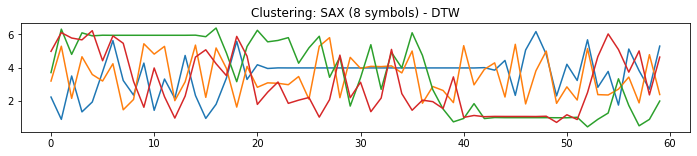

In [54]:
plt.figure(figsize=(12,2))
plt.title('Clustering: SAX (8 symbols) - DTW')
plt.plot(np.squeeze(km.cluster_centers_).T)
plt.show()

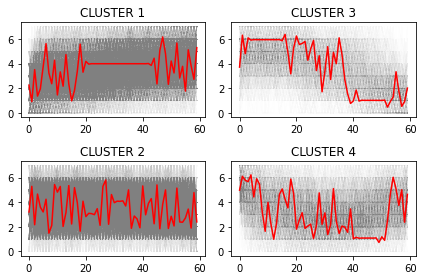

<Figure size 360x72 with 0 Axes>

<Figure size 360x72 with 0 Axes>

<Figure size 360x72 with 0 Axes>

<Figure size 360x72 with 0 Axes>

In [55]:
fig, ax = plt.subplots(2, 2)

plt.figure(figsize=(5,1))
ax[0, 0].set_title('CLUSTER 1')
ax[0, 0].plot(np.squeeze(df_sax[km.labels_ == 0]).T,color='black', alpha=0.2)
ax[0, 0].plot(np.squeeze(km.cluster_centers_[0]).T, color='yellow')
#plt.ylim(-0.3,0.3)

plt.figure(figsize=(5,1))
ax[1, 0].set_title('CLUSTER 2')
ax[1, 0].plot(np.squeeze(df_sax[km.labels_ == 1]).T,color='black', alpha=0.2)
ax[1, 0].plot(np.squeeze(km.cluster_centers_[1]).T, color='yellow')

#plt.ylim(-0.3,0.3)

plt.figure(figsize=(5,1))
ax[0, 1].set_title('CLUSTER 3')
ax[0, 1].plot(np.squeeze(df_sax[km.labels_ == 2]).T,color='black', alpha=0.2)
ax[0, 1].plot(np.squeeze(km.cluster_centers_[2]).T, color='yellow')
#plt.ylim(-0.3,0.3)

plt.figure(figsize=(5,1))
ax[1, 1].set_title('CLUSTER 4')
ax[1, 1].plot(np.squeeze(df_sax[km.labels_ == 3]).T,color='black', alpha=0.2)
ax[1, 1].plot(np.squeeze(km.cluster_centers_[3]).T, color='yellow')
#plt.ylim(-0.3,0.3)

fig.tight_layout()
plt.show()

In [56]:
for i in range(4):
    print("Cluster {}: {}".format(i, sum(km.labels_ == i)))

Cluster 0: 1460
Cluster 1: 1474
Cluster 2: 487
Cluster 3: 573


In [57]:
print('SSE:',km.inertia_,"\nSilouhette:",silhouette_score(df_sax, km.labels_))

SSE: 60.66748296586903 
Silouhette: 0.02212232458216544


In [58]:
for i in range(4):
    print('Cluster',i,'\n\n',df[km.labels_ == i]['genre_top'].value_counts(normalize=True),'\n\n')

Cluster 0 

 Rock            0.299315
Experimental    0.280822
Electronic      0.269863
Hip-Hop         0.150000
Name: genre_top, dtype: float64 


Cluster 1 

 Hip-Hop         0.433514
Electronic      0.233379
Experimental    0.172999
Rock            0.160109
Name: genre_top, dtype: float64 


Cluster 2 

 Experimental    0.326489
Rock            0.312115
Electronic      0.264887
Hip-Hop         0.096509
Name: genre_top, dtype: float64 


Cluster 3 

 Experimental    0.305410
Rock            0.303665
Electronic      0.230366
Hip-Hop         0.160558
Name: genre_top, dtype: float64 




## Sakoe-chiba

In [46]:
km = TimeSeriesKMeans(n_clusters=4, metric="dtw", metric_params= {"global_constraint":"sakoe_chiba"}, max_iter=100, random_state=42, verbose=True, n_jobs=2)
km.fit(df_sax)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 1246 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 1796 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 2446 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 3196 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 3994 out of 3994 | elapsed:    0.3s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 1246 

172.508 --> 

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 1246 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 1796 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 2446 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 3196 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 4046 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 4996 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done 6046 tasks      | elapsed:    0.5s
[Parallel(n_jobs=2)]: Done 7196 tasks      | elapsed:    0.6s
[Parallel(n_jobs=2)]: Done 8446 tasks      | elapsed:    0.7s
[Parallel(n_jobs=2)]: Done 9796 tasks      | elapsed:    0.8s
[Parallel(n_jobs=2)]: Done 11246 tasks      | elapsed:  

128.320 --> 

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 1246 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 1796 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 2446 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 3196 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 4046 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 4996 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done 6046 tasks      | elapsed:    0.5s
[Parallel(n_jobs=2)]: Done 7196 tasks      | elapsed:    0.6s
[Parallel(n_jobs=2)]: Done 8446 tasks      | elapsed:    0.7s
[Parallel(n_jobs=2)]: Done 9796 tasks      | elapsed:    0.8s
[Parallel(n_jobs=2)]: Done 11246 tasks      | elapsed:  

125.690 --> 

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 1246 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 1796 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 2446 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 3196 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 4046 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 4996 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done 6046 tasks      | elapsed:    0.5s
[Parallel(n_jobs=2)]: Done 7196 tasks      | elapsed:    0.6s
[Parallel(n_jobs=2)]: Done 8446 tasks      | elapsed:    0.7s
[Parallel(n_jobs=2)]: Done 9796 tasks      | elapsed:    0.8s
[Parallel(n_jobs=2)]: Done 11246 tasks      | elapsed:  

124.650 --> 

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 1246 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 1796 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 2446 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 3196 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 4046 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 4996 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done 6046 tasks      | elapsed:    0.5s
[Parallel(n_jobs=2)]: Done 7196 tasks      | elapsed:    0.6s
[Parallel(n_jobs=2)]: Done 8446 tasks      | elapsed:    0.7s
[Parallel(n_jobs=2)]: Done 9796 tasks      | elapsed:    0.8s
[Parallel(n_jobs=2)]: Done 11246 tasks      | elapsed:  

124.321 --> 

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 1246 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 1796 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 2446 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 3196 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 4046 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 4996 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done 6046 tasks      | elapsed:    0.5s
[Parallel(n_jobs=2)]: Done 7196 tasks      | elapsed:    0.6s
[Parallel(n_jobs=2)]: Done 8446 tasks      | elapsed:    0.7s
[Parallel(n_jobs=2)]: Done 9796 tasks      | elapsed:    0.8s
[Parallel(n_jobs=2)]: Done 11246 tasks      | elapsed:  

124.041 --> 

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 1246 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 1796 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 2446 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 3196 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 4046 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 4996 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done 6046 tasks      | elapsed:    0.5s
[Parallel(n_jobs=2)]: Done 7196 tasks      | elapsed:    0.6s
[Parallel(n_jobs=2)]: Done 8446 tasks      | elapsed:    0.7s
[Parallel(n_jobs=2)]: Done 9796 tasks      | elapsed:    0.8s
[Parallel(n_jobs=2)]: Done 11246 tasks      | elapsed:  

123.962 --> 

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 1246 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 1796 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 2446 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 3196 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 4046 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 4996 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done 6046 tasks      | elapsed:    0.5s
[Parallel(n_jobs=2)]: Done 7196 tasks      | elapsed:    0.6s
[Parallel(n_jobs=2)]: Done 8446 tasks      | elapsed:    0.7s
[Parallel(n_jobs=2)]: Done 9796 tasks      | elapsed:    0.8s
[Parallel(n_jobs=2)]: Done 11246 tasks      | elapsed:  

123.895 --> 

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 1246 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 1796 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 2446 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 3196 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 4046 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 4996 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done 6046 tasks      | elapsed:    0.5s
[Parallel(n_jobs=2)]: Done 7196 tasks      | elapsed:    0.6s
[Parallel(n_jobs=2)]: Done 8446 tasks      | elapsed:    0.7s
[Parallel(n_jobs=2)]: Done 9796 tasks      | elapsed:    0.8s
[Parallel(n_jobs=2)]: Done 11246 tasks      | elapsed:  

123.854 --> 

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 1246 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 1796 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 2446 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 3196 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 4046 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 4996 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done 6046 tasks      | elapsed:    0.5s
[Parallel(n_jobs=2)]: Done 7196 tasks      | elapsed:    0.6s
[Parallel(n_jobs=2)]: Done 8446 tasks      | elapsed:    0.7s
[Parallel(n_jobs=2)]: Done 9796 tasks      | elapsed:    0.8s
[Parallel(n_jobs=2)]: Done 11246 tasks      | elapsed:  

123.796 --> 

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 1246 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 1796 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 2446 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 3196 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 4046 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done 4996 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done 6046 tasks      | elapsed:    0.5s
[Parallel(n_jobs=2)]: Done 7196 tasks      | elapsed:    0.6s
[Parallel(n_jobs=2)]: Done 8446 tasks      | elapsed:    0.7s
[Parallel(n_jobs=2)]: Done 9796 tasks      | elapsed:    0.8s
[Parallel(n_jobs=2)]: Done 11246 tasks      | elapsed:  

123.760 --> 

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 1246 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 1796 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 2446 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 3196 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 4046 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 4996 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done 6046 tasks      | elapsed:    0.5s
[Parallel(n_jobs=2)]: Done 7196 tasks      | elapsed:    0.6s
[Parallel(n_jobs=2)]: Done 8446 tasks      | elapsed:    0.7s
[Parallel(n_jobs=2)]: Done 9796 tasks      | elapsed:    0.8s
[Parallel(n_jobs=2)]: Done 11246 tasks      | elapsed:  

123.714 --> 

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 1246 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 1796 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 2446 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 3196 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 4046 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 4996 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done 6046 tasks      | elapsed:    0.5s
[Parallel(n_jobs=2)]: Done 7196 tasks      | elapsed:    0.6s
[Parallel(n_jobs=2)]: Done 8446 tasks      | elapsed:    0.7s
[Parallel(n_jobs=2)]: Done 9796 tasks      | elapsed:    0.8s
[Parallel(n_jobs=2)]: Done 11246 tasks      | elapsed:  

123.662 --> 

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 1246 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 1796 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 2446 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 3196 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 4046 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 4996 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done 6046 tasks      | elapsed:    0.5s
[Parallel(n_jobs=2)]: Done 7196 tasks      | elapsed:    0.6s
[Parallel(n_jobs=2)]: Done 8446 tasks      | elapsed:    0.7s
[Parallel(n_jobs=2)]: Done 9796 tasks      | elapsed:    0.8s
[Parallel(n_jobs=2)]: Done 11246 tasks      | elapsed:  

123.648 --> 

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 1246 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 1796 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 2446 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 3196 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 4046 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 4996 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done 6046 tasks      | elapsed:    0.5s
[Parallel(n_jobs=2)]: Done 7196 tasks      | elapsed:    0.6s
[Parallel(n_jobs=2)]: Done 8446 tasks      | elapsed:    0.7s
[Parallel(n_jobs=2)]: Done 9796 tasks      | elapsed:    0.8s
[Parallel(n_jobs=2)]: Done 11246 tasks      | elapsed:  

123.639 --> 

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 1246 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 1796 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 2446 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 3196 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 4046 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 4996 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done 6046 tasks      | elapsed:    0.5s
[Parallel(n_jobs=2)]: Done 7196 tasks      | elapsed:    0.6s
[Parallel(n_jobs=2)]: Done 8446 tasks      | elapsed:    0.7s
[Parallel(n_jobs=2)]: Done 9796 tasks      | elapsed:    0.8s
[Parallel(n_jobs=2)]: Done 11246 tasks      | elapsed:  

123.632 --> 

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 1246 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 1796 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 2446 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 3196 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 4046 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 4996 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done 6046 tasks      | elapsed:    0.5s
[Parallel(n_jobs=2)]: Done 7196 tasks      | elapsed:    0.6s
[Parallel(n_jobs=2)]: Done 8446 tasks      | elapsed:    0.7s
[Parallel(n_jobs=2)]: Done 9796 tasks      | elapsed:    0.8s
[Parallel(n_jobs=2)]: Done 11246 tasks      | elapsed:  

123.626 --> 

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 1246 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 1796 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 2446 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 3196 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 4046 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 4996 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done 6046 tasks      | elapsed:    0.5s
[Parallel(n_jobs=2)]: Done 7196 tasks      | elapsed:    0.6s
[Parallel(n_jobs=2)]: Done 8446 tasks      | elapsed:    0.7s
[Parallel(n_jobs=2)]: Done 9796 tasks      | elapsed:    0.8s
[Parallel(n_jobs=2)]: Done 11246 tasks      | elapsed:  

123.621 --> 

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 1246 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 1796 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 2446 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 3196 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 4046 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 4996 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done 6046 tasks      | elapsed:    0.5s
[Parallel(n_jobs=2)]: Done 7196 tasks      | elapsed:    0.6s
[Parallel(n_jobs=2)]: Done 8446 tasks      | elapsed:    0.7s
[Parallel(n_jobs=2)]: Done 9796 tasks      | elapsed:    0.8s
[Parallel(n_jobs=2)]: Done 11246 tasks      | elapsed:  

123.539 --> 

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 1246 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 1796 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 2446 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 3196 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 4046 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 4996 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done 6046 tasks      | elapsed:    0.5s
[Parallel(n_jobs=2)]: Done 7196 tasks      | elapsed:    0.6s
[Parallel(n_jobs=2)]: Done 8446 tasks      | elapsed:    0.7s
[Parallel(n_jobs=2)]: Done 9796 tasks      | elapsed:    0.8s
[Parallel(n_jobs=2)]: Done 11246 tasks      | elapsed:  

123.525 --> 

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 1246 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 1796 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 2446 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 3196 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 4046 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 4996 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done 6046 tasks      | elapsed:    0.5s
[Parallel(n_jobs=2)]: Done 7196 tasks      | elapsed:    0.6s
[Parallel(n_jobs=2)]: Done 8446 tasks      | elapsed:    0.7s
[Parallel(n_jobs=2)]: Done 9796 tasks      | elapsed:    0.8s
[Parallel(n_jobs=2)]: Done 11246 tasks      | elapsed:  

123.514 --> 

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 1246 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 1796 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 2446 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 3196 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 4046 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 4996 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done 6046 tasks      | elapsed:    0.5s
[Parallel(n_jobs=2)]: Done 7196 tasks      | elapsed:    0.6s
[Parallel(n_jobs=2)]: Done 8446 tasks      | elapsed:    0.7s
[Parallel(n_jobs=2)]: Done 9796 tasks      | elapsed:    0.8s
[Parallel(n_jobs=2)]: Done 11246 tasks      | elapsed:  

123.498 --> 

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 1246 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 1796 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 2446 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 3196 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 4046 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 4996 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done 6046 tasks      | elapsed:    0.5s
[Parallel(n_jobs=2)]: Done 7196 tasks      | elapsed:    0.6s
[Parallel(n_jobs=2)]: Done 8446 tasks      | elapsed:    0.7s
[Parallel(n_jobs=2)]: Done 9796 tasks      | elapsed:    0.8s
[Parallel(n_jobs=2)]: Done 11246 tasks      | elapsed:  

123.468 --> 

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 1246 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 1796 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 2446 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 3196 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 4046 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 4996 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done 6046 tasks      | elapsed:    0.5s
[Parallel(n_jobs=2)]: Done 7196 tasks      | elapsed:    0.6s
[Parallel(n_jobs=2)]: Done 8446 tasks      | elapsed:    0.7s
[Parallel(n_jobs=2)]: Done 9796 tasks      | elapsed:    0.8s
[Parallel(n_jobs=2)]: Done 11246 tasks      | elapsed:  

123.416 --> 

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 1246 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 1796 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 2446 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 3196 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 4046 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 4996 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done 6046 tasks      | elapsed:    0.5s
[Parallel(n_jobs=2)]: Done 7196 tasks      | elapsed:    0.6s
[Parallel(n_jobs=2)]: Done 8446 tasks      | elapsed:    0.7s
[Parallel(n_jobs=2)]: Done 9796 tasks      | elapsed:    0.8s
[Parallel(n_jobs=2)]: Done 11246 tasks      | elapsed:  

123.348 --> 

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 1246 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 1796 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 2446 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 3196 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 4046 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 4996 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done 6046 tasks      | elapsed:    0.5s
[Parallel(n_jobs=2)]: Done 7196 tasks      | elapsed:    0.6s
[Parallel(n_jobs=2)]: Done 8446 tasks      | elapsed:    0.7s
[Parallel(n_jobs=2)]: Done 9796 tasks      | elapsed:    0.8s
[Parallel(n_jobs=2)]: Done 11246 tasks      | elapsed:  

123.282 --> 

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 1246 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 1796 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 2446 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 3196 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 4046 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 4996 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done 6046 tasks      | elapsed:    0.5s
[Parallel(n_jobs=2)]: Done 7196 tasks      | elapsed:    0.6s
[Parallel(n_jobs=2)]: Done 8446 tasks      | elapsed:    0.7s
[Parallel(n_jobs=2)]: Done 9796 tasks      | elapsed:    0.8s
[Parallel(n_jobs=2)]: Done 11246 tasks      | elapsed:  

123.191 --> 

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 1246 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 1796 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 2446 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 3196 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 4046 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 4996 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done 6046 tasks      | elapsed:    0.5s
[Parallel(n_jobs=2)]: Done 7196 tasks      | elapsed:    0.6s
[Parallel(n_jobs=2)]: Done 8446 tasks      | elapsed:    0.7s
[Parallel(n_jobs=2)]: Done 9796 tasks      | elapsed:    0.8s
[Parallel(n_jobs=2)]: Done 11246 tasks      | elapsed:  

123.037 --> 

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 1246 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 1796 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 2446 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 3196 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 4046 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 4996 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done 6046 tasks      | elapsed:    0.5s
[Parallel(n_jobs=2)]: Done 7196 tasks      | elapsed:    0.6s
[Parallel(n_jobs=2)]: Done 8446 tasks      | elapsed:    0.7s
[Parallel(n_jobs=2)]: Done 9796 tasks      | elapsed:    0.8s
[Parallel(n_jobs=2)]: Done 11246 tasks      | elapsed:  

122.929 --> 

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 1246 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 1796 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 2446 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 3196 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 4046 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 4996 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done 6046 tasks      | elapsed:    0.5s
[Parallel(n_jobs=2)]: Done 7196 tasks      | elapsed:    0.6s
[Parallel(n_jobs=2)]: Done 8446 tasks      | elapsed:    0.7s
[Parallel(n_jobs=2)]: Done 9796 tasks      | elapsed:    0.8s
[Parallel(n_jobs=2)]: Done 11246 tasks      | elapsed:  

122.864 --> 

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 1246 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 1796 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 2446 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 3196 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 4046 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 4996 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done 6046 tasks      | elapsed:    0.5s
[Parallel(n_jobs=2)]: Done 7196 tasks      | elapsed:    0.6s
[Parallel(n_jobs=2)]: Done 8446 tasks      | elapsed:    0.7s
[Parallel(n_jobs=2)]: Done 9796 tasks      | elapsed:    0.8s
[Parallel(n_jobs=2)]: Done 11246 tasks      | elapsed:  

122.772 --> 

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 1246 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 1796 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 2446 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 3196 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 4046 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 4996 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done 6046 tasks      | elapsed:    0.5s
[Parallel(n_jobs=2)]: Done 7196 tasks      | elapsed:    0.6s
[Parallel(n_jobs=2)]: Done 8446 tasks      | elapsed:    0.7s
[Parallel(n_jobs=2)]: Done 9796 tasks      | elapsed:    0.8s
[Parallel(n_jobs=2)]: Done 11246 tasks      | elapsed:  

122.725 --> 

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 1246 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 1796 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 2446 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 3196 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 4046 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 4996 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done 6046 tasks      | elapsed:    0.5s
[Parallel(n_jobs=2)]: Done 7196 tasks      | elapsed:    0.6s
[Parallel(n_jobs=2)]: Done 8446 tasks      | elapsed:    0.7s
[Parallel(n_jobs=2)]: Done 9796 tasks      | elapsed:    0.8s
[Parallel(n_jobs=2)]: Done 11246 tasks      | elapsed:  

122.704 --> 

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 1246 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 1796 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 2446 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 3196 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 4046 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 4996 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done 6046 tasks      | elapsed:    0.5s
[Parallel(n_jobs=2)]: Done 7196 tasks      | elapsed:    0.6s
[Parallel(n_jobs=2)]: Done 8446 tasks      | elapsed:    0.7s
[Parallel(n_jobs=2)]: Done 9796 tasks      | elapsed:    0.8s
[Parallel(n_jobs=2)]: Done 11246 tasks      | elapsed:  

122.692 --> 

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 1246 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 1796 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 2446 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 3196 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 4046 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 4996 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done 6046 tasks      | elapsed:    0.5s
[Parallel(n_jobs=2)]: Done 7196 tasks      | elapsed:    0.6s
[Parallel(n_jobs=2)]: Done 8446 tasks      | elapsed:    0.7s
[Parallel(n_jobs=2)]: Done 9796 tasks      | elapsed:    0.8s
[Parallel(n_jobs=2)]: Done 11246 tasks      | elapsed:  

122.685 --> 

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 1246 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 1796 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 2446 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 3196 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 4046 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 4996 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done 6046 tasks      | elapsed:    0.5s
[Parallel(n_jobs=2)]: Done 7196 tasks      | elapsed:    0.6s
[Parallel(n_jobs=2)]: Done 8446 tasks      | elapsed:    0.7s
[Parallel(n_jobs=2)]: Done 9796 tasks      | elapsed:    0.8s
[Parallel(n_jobs=2)]: Done 11246 tasks      | elapsed:  

122.679 --> 

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 1246 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 1796 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 2446 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 3196 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 4046 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 4996 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done 6046 tasks      | elapsed:    0.5s
[Parallel(n_jobs=2)]: Done 7196 tasks      | elapsed:    0.6s
[Parallel(n_jobs=2)]: Done 8446 tasks      | elapsed:    0.7s
[Parallel(n_jobs=2)]: Done 9796 tasks      | elapsed:    0.8s
[Parallel(n_jobs=2)]: Done 11246 tasks      | elapsed:  

122.676 --> 

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 1246 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 1796 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 2446 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 3196 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 4046 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 4996 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done 6046 tasks      | elapsed:    0.5s
[Parallel(n_jobs=2)]: Done 7196 tasks      | elapsed:    0.6s
[Parallel(n_jobs=2)]: Done 8446 tasks      | elapsed:    0.7s
[Parallel(n_jobs=2)]: Done 9796 tasks      | elapsed:    0.8s
[Parallel(n_jobs=2)]: Done 11246 tasks      | elapsed:  

122.668 --> 

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 1246 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 1796 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 2446 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 3196 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 4046 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 4996 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done 6046 tasks      | elapsed:    0.5s
[Parallel(n_jobs=2)]: Done 7196 tasks      | elapsed:    0.6s
[Parallel(n_jobs=2)]: Done 8446 tasks      | elapsed:    0.7s
[Parallel(n_jobs=2)]: Done 9796 tasks      | elapsed:    0.8s
[Parallel(n_jobs=2)]: Done 11246 tasks      | elapsed:  

122.665 --> 

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 1246 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 1796 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 2446 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 3196 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 4046 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 4996 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done 6046 tasks      | elapsed:    0.5s
[Parallel(n_jobs=2)]: Done 7196 tasks      | elapsed:    0.6s
[Parallel(n_jobs=2)]: Done 8446 tasks      | elapsed:    0.7s
[Parallel(n_jobs=2)]: Done 9796 tasks      | elapsed:    0.8s
[Parallel(n_jobs=2)]: Done 11246 tasks      | elapsed:  

122.663 --> 

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 1246 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 1796 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 2446 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 3196 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 4046 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 4996 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done 6046 tasks      | elapsed:    0.5s
[Parallel(n_jobs=2)]: Done 7196 tasks      | elapsed:    0.6s
[Parallel(n_jobs=2)]: Done 8446 tasks      | elapsed:    0.7s
[Parallel(n_jobs=2)]: Done 9796 tasks      | elapsed:    0.8s
[Parallel(n_jobs=2)]: Done 11246 tasks      | elapsed:  

122.660 --> 

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 1246 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 1796 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 2446 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 3196 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 4046 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 4996 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done 6046 tasks      | elapsed:    0.5s
[Parallel(n_jobs=2)]: Done 7196 tasks      | elapsed:    0.6s
[Parallel(n_jobs=2)]: Done 8446 tasks      | elapsed:    0.7s
[Parallel(n_jobs=2)]: Done 9796 tasks      | elapsed:    0.8s
[Parallel(n_jobs=2)]: Done 11246 tasks      | elapsed:  

122.643 --> 

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 1246 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 1796 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 2446 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 3196 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 4046 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 4996 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done 6046 tasks      | elapsed:    0.5s
[Parallel(n_jobs=2)]: Done 7196 tasks      | elapsed:    0.6s
[Parallel(n_jobs=2)]: Done 8446 tasks      | elapsed:    0.7s
[Parallel(n_jobs=2)]: Done 9796 tasks      | elapsed:    0.8s
[Parallel(n_jobs=2)]: Done 11246 tasks      | elapsed:  

122.639 --> 

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 1246 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 1796 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 2446 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 3196 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 4046 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 4996 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done 6046 tasks      | elapsed:    0.5s
[Parallel(n_jobs=2)]: Done 7196 tasks      | elapsed:    0.6s
[Parallel(n_jobs=2)]: Done 8446 tasks      | elapsed:    0.7s
[Parallel(n_jobs=2)]: Done 9796 tasks      | elapsed:    0.8s
[Parallel(n_jobs=2)]: Done 11246 tasks      | elapsed:  

122.635 --> 

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 1246 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 1796 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 2446 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 3196 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 4046 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 4996 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done 6046 tasks      | elapsed:    0.5s
[Parallel(n_jobs=2)]: Done 7196 tasks      | elapsed:    0.6s
[Parallel(n_jobs=2)]: Done 8446 tasks      | elapsed:    0.7s
[Parallel(n_jobs=2)]: Done 9796 tasks      | elapsed:    0.8s
[Parallel(n_jobs=2)]: Done 11246 tasks      | elapsed:  

122.634 --> 

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 1246 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 1796 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 2446 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 3196 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 4046 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 4996 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done 6046 tasks      | elapsed:    0.5s
[Parallel(n_jobs=2)]: Done 7196 tasks      | elapsed:    0.6s
[Parallel(n_jobs=2)]: Done 8446 tasks      | elapsed:    0.7s
[Parallel(n_jobs=2)]: Done 9796 tasks      | elapsed:    0.8s
[Parallel(n_jobs=2)]: Done 11246 tasks      | elapsed:  

122.634 --> 

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 1246 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 1796 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 2446 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 3196 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 4046 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 4996 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done 6046 tasks      | elapsed:    0.5s
[Parallel(n_jobs=2)]: Done 7196 tasks      | elapsed:    0.6s
[Parallel(n_jobs=2)]: Done 8446 tasks      | elapsed:    0.7s
[Parallel(n_jobs=2)]: Done 9796 tasks      | elapsed:    0.8s
[Parallel(n_jobs=2)]: Done 11246 tasks      | elapsed:  

122.634 --> 


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 1246 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 1796 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 2446 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 3196 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 4046 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 4996 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done 6046 tasks      | elapsed:    0.5s
[Parallel(n_jobs=2)]: Done 7196 tasks      | elapsed:    0.6s
[Parallel(n_jobs=2)]: Done 8446 tasks      | elapsed:    0.7s
[Parallel(n_jobs=2)]: Done 9796 tasks      | elapsed:    0.8s
[Parallel(n_jobs=2)]: Done 11246 tasks      | elapsed:  

TimeSeriesKMeans(max_iter=100, metric='dtw',
                 metric_params={'global_constraint': 'sakoe_chiba'},
                 n_clusters=4, n_jobs=2, random_state=42, verbose=True)

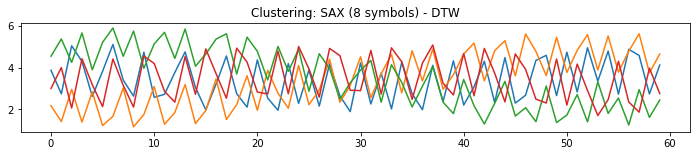

In [47]:
plt.figure(figsize=(12,2))
plt.title('Clustering: SAX (8 symbols) - DTW')
plt.plot(np.squeeze(km.cluster_centers_).T)
plt.show()

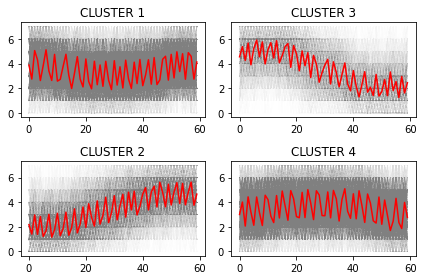

<Figure size 360x72 with 0 Axes>

<Figure size 360x72 with 0 Axes>

<Figure size 360x72 with 0 Axes>

<Figure size 360x72 with 0 Axes>

In [48]:
fig, ax = plt.subplots(2, 2)

plt.figure(figsize=(5,1))
ax[0, 0].set_title('CLUSTER 1')
ax[0, 0].plot(np.squeeze(df_sax[km.labels_ == 0]).T,color='black', alpha=0.2)
ax[0, 0].plot(np.squeeze(km.cluster_centers_[0]).T, color='yellow')
#plt.ylim(-0.3,0.3)

plt.figure(figsize=(5,1))
ax[1, 0].set_title('CLUSTER 2')
ax[1, 0].plot(np.squeeze(df_sax[km.labels_ == 1]).T,color='black', alpha=0.2)
ax[1, 0].plot(np.squeeze(km.cluster_centers_[1]).T, color='yellow')

#plt.ylim(-0.3,0.3)

plt.figure(figsize=(5,1))
ax[0, 1].set_title('CLUSTER 3')
ax[0, 1].plot(np.squeeze(df_sax[km.labels_ == 2]).T,color='black', alpha=0.2)
ax[0, 1].plot(np.squeeze(km.cluster_centers_[2]).T, color='yellow')
#plt.ylim(-0.3,0.3)

plt.figure(figsize=(5,1))
ax[1, 1].set_title('CLUSTER 4')
ax[1, 1].plot(np.squeeze(df_sax[km.labels_ == 3]).T,color='black', alpha=0.2)
ax[1, 1].plot(np.squeeze(km.cluster_centers_[3]).T, color='yellow')
#plt.ylim(-0.3,0.3)

fig.tight_layout()
plt.show()

In [49]:
for i in range(4):
    print("Cluster {}: {}".format(i, sum(km.labels_ == i)))

Cluster 0: 1287
Cluster 1: 752
Cluster 2: 556
Cluster 3: 1399


In [50]:
print('SSE:',km.inertia_,"\nSilouhette:",silhouette_score(df_sax, km.labels_))

SSE: 122.63430684418894 
Silouhette: 0.04238156393038964


In [51]:
for i in range(4):
    print('Cluster',i,'\n\n',df[km.labels_ == i]['genre_top'].value_counts(normalize=True),'\n\n')

Cluster 0 

 Hip-Hop         0.287490
Electronic      0.250971
Experimental    0.238539
Rock            0.222999
Name: genre_top, dtype: float64 


Cluster 1 

 Rock            0.332447
Experimental    0.271277
Electronic      0.238032
Hip-Hop         0.158245
Name: genre_top, dtype: float64 


Cluster 2 

 Experimental    0.305755
Electronic      0.276978
Rock            0.271583
Hip-Hop         0.145683
Name: genre_top, dtype: float64 


Cluster 3 

 Hip-Hop         0.305218
Electronic      0.245175
Experimental    0.227305
Rock            0.222302
Name: genre_top, dtype: float64 




## Itakura

In [39]:
km = TimeSeriesKMeans(n_clusters=4, metric="dtw", metric_params= {"global_constraint":"itakura"}, max_iter=100, random_state=42, verbose=True, n_jobs=2)
km.fit(df_sax)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done 1246 tasks      | elapsed:    0.6s
[Parallel(n_jobs=2)]: Done 1796 tasks      | elapsed:    0.9s
[Parallel(n_jobs=2)]: Done 2446 tasks      | elapsed:    1.2s
[Parallel(n_jobs=2)]: Done 3196 tasks      | elapsed:    1.5s
[Parallel(n_jobs=2)]: Done 3994 out of 3994 | elapsed:    1.9s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done 1246 

98.725 --> 

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done 1246 tasks      | elapsed:    0.6s
[Parallel(n_jobs=2)]: Done 1796 tasks      | elapsed:    0.8s
[Parallel(n_jobs=2)]: Done 2446 tasks      | elapsed:    1.1s
[Parallel(n_jobs=2)]: Done 3196 tasks      | elapsed:    1.5s
[Parallel(n_jobs=2)]: Done 4046 tasks      | elapsed:    1.9s
[Parallel(n_jobs=2)]: Done 4996 tasks      | elapsed:    2.3s
[Parallel(n_jobs=2)]: Done 6046 tasks      | elapsed:    2.8s
[Parallel(n_jobs=2)]: Done 7196 tasks      | elapsed:    3.3s
[Parallel(n_jobs=2)]: Done 8446 tasks      | elapsed:    3.9s
[Parallel(n_jobs=2)]: Done 9796 tasks      | elapsed:    4.5s
[Parallel(n_jobs=2)]: Done 11246 tasks      | elapsed:  

75.378 --> 

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done 1246 tasks      | elapsed:    0.6s
[Parallel(n_jobs=2)]: Done 1796 tasks      | elapsed:    0.8s
[Parallel(n_jobs=2)]: Done 2446 tasks      | elapsed:    1.1s
[Parallel(n_jobs=2)]: Done 3196 tasks      | elapsed:    1.5s
[Parallel(n_jobs=2)]: Done 4046 tasks      | elapsed:    1.9s
[Parallel(n_jobs=2)]: Done 4996 tasks      | elapsed:    2.3s
[Parallel(n_jobs=2)]: Done 6046 tasks      | elapsed:    2.8s
[Parallel(n_jobs=2)]: Done 7196 tasks      | elapsed:    3.3s
[Parallel(n_jobs=2)]: Done 8446 tasks      | elapsed:    3.9s
[Parallel(n_jobs=2)]: Done 9796 tasks      | elapsed:    4.5s
[Parallel(n_jobs=2)]: Done 11246 tasks      | elapsed:  

73.781 --> 

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done 1246 tasks      | elapsed:    0.6s
[Parallel(n_jobs=2)]: Done 1796 tasks      | elapsed:    0.8s
[Parallel(n_jobs=2)]: Done 2446 tasks      | elapsed:    1.1s
[Parallel(n_jobs=2)]: Done 3196 tasks      | elapsed:    1.5s
[Parallel(n_jobs=2)]: Done 4046 tasks      | elapsed:    1.9s
[Parallel(n_jobs=2)]: Done 4996 tasks      | elapsed:    2.3s
[Parallel(n_jobs=2)]: Done 6046 tasks      | elapsed:    2.8s
[Parallel(n_jobs=2)]: Done 7196 tasks      | elapsed:    3.3s
[Parallel(n_jobs=2)]: Done 8446 tasks      | elapsed:    3.9s
[Parallel(n_jobs=2)]: Done 9796 tasks      | elapsed:    4.5s
[Parallel(n_jobs=2)]: Done 11246 tasks      | elapsed:  

72.951 --> 

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done 1246 tasks      | elapsed:    0.6s
[Parallel(n_jobs=2)]: Done 1796 tasks      | elapsed:    0.8s
[Parallel(n_jobs=2)]: Done 2446 tasks      | elapsed:    1.2s
[Parallel(n_jobs=2)]: Done 3196 tasks      | elapsed:    1.5s
[Parallel(n_jobs=2)]: Done 4046 tasks      | elapsed:    1.9s
[Parallel(n_jobs=2)]: Done 4996 tasks      | elapsed:    2.4s
[Parallel(n_jobs=2)]: Done 6046 tasks      | elapsed:    2.9s
[Parallel(n_jobs=2)]: Done 7196 tasks      | elapsed:    3.4s
[Parallel(n_jobs=2)]: Done 8446 tasks      | elapsed:    4.0s
[Parallel(n_jobs=2)]: Done 9796 tasks      | elapsed:    4.6s
[Parallel(n_jobs=2)]: Done 11246 tasks      | elapsed:  

72.678 --> 

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done 1246 tasks      | elapsed:    0.6s
[Parallel(n_jobs=2)]: Done 1796 tasks      | elapsed:    0.9s
[Parallel(n_jobs=2)]: Done 2446 tasks      | elapsed:    1.2s
[Parallel(n_jobs=2)]: Done 3196 tasks      | elapsed:    1.5s
[Parallel(n_jobs=2)]: Done 4046 tasks      | elapsed:    1.9s
[Parallel(n_jobs=2)]: Done 4996 tasks      | elapsed:    2.4s
[Parallel(n_jobs=2)]: Done 6046 tasks      | elapsed:    2.9s
[Parallel(n_jobs=2)]: Done 7196 tasks      | elapsed:    3.4s
[Parallel(n_jobs=2)]: Done 8446 tasks      | elapsed:    4.0s
[Parallel(n_jobs=2)]: Done 9796 tasks      | elapsed:    4.6s
[Parallel(n_jobs=2)]: Done 11246 tasks      | elapsed:  

72.378 --> 

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done 1246 tasks      | elapsed:    0.6s
[Parallel(n_jobs=2)]: Done 1796 tasks      | elapsed:    0.9s
[Parallel(n_jobs=2)]: Done 2446 tasks      | elapsed:    1.2s
[Parallel(n_jobs=2)]: Done 3196 tasks      | elapsed:    1.5s
[Parallel(n_jobs=2)]: Done 4046 tasks      | elapsed:    1.9s
[Parallel(n_jobs=2)]: Done 4996 tasks      | elapsed:    2.4s
[Parallel(n_jobs=2)]: Done 6046 tasks      | elapsed:    2.9s
[Parallel(n_jobs=2)]: Done 7196 tasks      | elapsed:    3.5s
[Parallel(n_jobs=2)]: Done 8446 tasks      | elapsed:    4.1s
[Parallel(n_jobs=2)]: Done 9796 tasks      | elapsed:    4.7s
[Parallel(n_jobs=2)]: Done 11246 tasks      | elapsed:  

71.992 --> 

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done 1246 tasks      | elapsed:    0.6s
[Parallel(n_jobs=2)]: Done 1796 tasks      | elapsed:    0.9s
[Parallel(n_jobs=2)]: Done 2446 tasks      | elapsed:    1.2s
[Parallel(n_jobs=2)]: Done 3196 tasks      | elapsed:    1.6s
[Parallel(n_jobs=2)]: Done 4046 tasks      | elapsed:    2.0s
[Parallel(n_jobs=2)]: Done 4996 tasks      | elapsed:    2.5s
[Parallel(n_jobs=2)]: Done 6046 tasks      | elapsed:    3.0s
[Parallel(n_jobs=2)]: Done 7196 tasks      | elapsed:    3.5s
[Parallel(n_jobs=2)]: Done 8446 tasks      | elapsed:    4.1s
[Parallel(n_jobs=2)]: Done 9796 tasks      | elapsed:    4.7s
[Parallel(n_jobs=2)]: Done 11246 tasks      | elapsed:  

71.765 --> 

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done 1246 tasks      | elapsed:    0.6s
[Parallel(n_jobs=2)]: Done 1796 tasks      | elapsed:    0.9s
[Parallel(n_jobs=2)]: Done 2446 tasks      | elapsed:    1.2s
[Parallel(n_jobs=2)]: Done 3196 tasks      | elapsed:    1.6s
[Parallel(n_jobs=2)]: Done 4046 tasks      | elapsed:    2.0s
[Parallel(n_jobs=2)]: Done 4996 tasks      | elapsed:    2.4s
[Parallel(n_jobs=2)]: Done 6046 tasks      | elapsed:    2.9s
[Parallel(n_jobs=2)]: Done 7196 tasks      | elapsed:    3.4s
[Parallel(n_jobs=2)]: Done 8446 tasks      | elapsed:    4.0s
[Parallel(n_jobs=2)]: Done 9796 tasks      | elapsed:    4.6s
[Parallel(n_jobs=2)]: Done 11246 tasks      | elapsed:  

71.660 --> 

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done 1246 tasks      | elapsed:    0.6s
[Parallel(n_jobs=2)]: Done 1796 tasks      | elapsed:    0.8s
[Parallel(n_jobs=2)]: Done 2446 tasks      | elapsed:    1.1s
[Parallel(n_jobs=2)]: Done 3196 tasks      | elapsed:    1.5s
[Parallel(n_jobs=2)]: Done 4046 tasks      | elapsed:    1.9s
[Parallel(n_jobs=2)]: Done 4996 tasks      | elapsed:    2.3s
[Parallel(n_jobs=2)]: Done 6046 tasks      | elapsed:    2.8s
[Parallel(n_jobs=2)]: Done 7196 tasks      | elapsed:    3.4s
[Parallel(n_jobs=2)]: Done 8446 tasks      | elapsed:    3.9s
[Parallel(n_jobs=2)]: Done 9796 tasks      | elapsed:    4.6s
[Parallel(n_jobs=2)]: Done 11246 tasks      | elapsed:  

71.598 --> 

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done 1246 tasks      | elapsed:    0.6s
[Parallel(n_jobs=2)]: Done 1796 tasks      | elapsed:    0.8s
[Parallel(n_jobs=2)]: Done 2446 tasks      | elapsed:    1.1s
[Parallel(n_jobs=2)]: Done 3196 tasks      | elapsed:    1.5s
[Parallel(n_jobs=2)]: Done 4046 tasks      | elapsed:    1.9s
[Parallel(n_jobs=2)]: Done 4996 tasks      | elapsed:    2.3s
[Parallel(n_jobs=2)]: Done 6046 tasks      | elapsed:    2.8s
[Parallel(n_jobs=2)]: Done 7196 tasks      | elapsed:    3.3s
[Parallel(n_jobs=2)]: Done 8446 tasks      | elapsed:    3.9s
[Parallel(n_jobs=2)]: Done 9796 tasks      | elapsed:    4.6s
[Parallel(n_jobs=2)]: Done 11246 tasks      | elapsed:  

71.520 --> 

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done 1246 tasks      | elapsed:    0.6s
[Parallel(n_jobs=2)]: Done 1796 tasks      | elapsed:    0.8s
[Parallel(n_jobs=2)]: Done 2446 tasks      | elapsed:    1.1s
[Parallel(n_jobs=2)]: Done 3196 tasks      | elapsed:    1.5s
[Parallel(n_jobs=2)]: Done 4046 tasks      | elapsed:    1.9s
[Parallel(n_jobs=2)]: Done 4996 tasks      | elapsed:    2.3s
[Parallel(n_jobs=2)]: Done 6046 tasks      | elapsed:    2.8s
[Parallel(n_jobs=2)]: Done 7196 tasks      | elapsed:    3.3s
[Parallel(n_jobs=2)]: Done 8446 tasks      | elapsed:    3.9s
[Parallel(n_jobs=2)]: Done 9796 tasks      | elapsed:    4.5s
[Parallel(n_jobs=2)]: Done 11246 tasks      | elapsed:  

71.437 --> 

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done 1246 tasks      | elapsed:    0.6s
[Parallel(n_jobs=2)]: Done 1796 tasks      | elapsed:    0.9s
[Parallel(n_jobs=2)]: Done 2446 tasks      | elapsed:    1.2s
[Parallel(n_jobs=2)]: Done 3196 tasks      | elapsed:    1.6s
[Parallel(n_jobs=2)]: Done 4046 tasks      | elapsed:    2.0s
[Parallel(n_jobs=2)]: Done 4996 tasks      | elapsed:    2.5s
[Parallel(n_jobs=2)]: Done 6046 tasks      | elapsed:    3.0s
[Parallel(n_jobs=2)]: Done 7196 tasks      | elapsed:    3.5s
[Parallel(n_jobs=2)]: Done 8446 tasks      | elapsed:    4.1s
[Parallel(n_jobs=2)]: Done 9796 tasks      | elapsed:    4.7s
[Parallel(n_jobs=2)]: Done 11246 tasks      | elapsed:  

71.360 --> 

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done 1246 tasks      | elapsed:    0.6s
[Parallel(n_jobs=2)]: Done 1796 tasks      | elapsed:    0.9s
[Parallel(n_jobs=2)]: Done 2446 tasks      | elapsed:    1.2s
[Parallel(n_jobs=2)]: Done 3196 tasks      | elapsed:    1.5s
[Parallel(n_jobs=2)]: Done 4046 tasks      | elapsed:    1.9s
[Parallel(n_jobs=2)]: Done 4996 tasks      | elapsed:    2.3s
[Parallel(n_jobs=2)]: Done 6046 tasks      | elapsed:    2.8s
[Parallel(n_jobs=2)]: Done 7196 tasks      | elapsed:    3.4s
[Parallel(n_jobs=2)]: Done 8446 tasks      | elapsed:    4.0s
[Parallel(n_jobs=2)]: Done 9796 tasks      | elapsed:    4.6s
[Parallel(n_jobs=2)]: Done 11246 tasks      | elapsed:  

71.223 --> 

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done 1246 tasks      | elapsed:    0.6s
[Parallel(n_jobs=2)]: Done 1796 tasks      | elapsed:    0.8s
[Parallel(n_jobs=2)]: Done 2446 tasks      | elapsed:    1.2s
[Parallel(n_jobs=2)]: Done 3196 tasks      | elapsed:    1.5s
[Parallel(n_jobs=2)]: Done 4046 tasks      | elapsed:    1.9s
[Parallel(n_jobs=2)]: Done 4996 tasks      | elapsed:    2.3s
[Parallel(n_jobs=2)]: Done 6046 tasks      | elapsed:    2.8s
[Parallel(n_jobs=2)]: Done 7196 tasks      | elapsed:    3.3s
[Parallel(n_jobs=2)]: Done 8446 tasks      | elapsed:    3.9s
[Parallel(n_jobs=2)]: Done 9796 tasks      | elapsed:    4.5s
[Parallel(n_jobs=2)]: Done 11246 tasks      | elapsed:  

71.164 --> 

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done 1246 tasks      | elapsed:    0.6s
[Parallel(n_jobs=2)]: Done 1796 tasks      | elapsed:    0.9s
[Parallel(n_jobs=2)]: Done 2446 tasks      | elapsed:    1.2s
[Parallel(n_jobs=2)]: Done 3196 tasks      | elapsed:    1.5s
[Parallel(n_jobs=2)]: Done 4046 tasks      | elapsed:    1.9s
[Parallel(n_jobs=2)]: Done 4996 tasks      | elapsed:    2.4s
[Parallel(n_jobs=2)]: Done 6046 tasks      | elapsed:    2.9s
[Parallel(n_jobs=2)]: Done 7196 tasks      | elapsed:    3.4s
[Parallel(n_jobs=2)]: Done 8446 tasks      | elapsed:    4.0s
[Parallel(n_jobs=2)]: Done 9796 tasks      | elapsed:    4.6s
[Parallel(n_jobs=2)]: Done 11246 tasks      | elapsed:  

70.941 --> 

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done 1246 tasks      | elapsed:    0.6s
[Parallel(n_jobs=2)]: Done 1796 tasks      | elapsed:    0.8s
[Parallel(n_jobs=2)]: Done 2446 tasks      | elapsed:    1.1s
[Parallel(n_jobs=2)]: Done 3196 tasks      | elapsed:    1.5s
[Parallel(n_jobs=2)]: Done 4046 tasks      | elapsed:    1.9s
[Parallel(n_jobs=2)]: Done 4996 tasks      | elapsed:    2.3s
[Parallel(n_jobs=2)]: Done 6046 tasks      | elapsed:    2.8s
[Parallel(n_jobs=2)]: Done 7196 tasks      | elapsed:    3.4s
[Parallel(n_jobs=2)]: Done 8446 tasks      | elapsed:    4.0s
[Parallel(n_jobs=2)]: Done 9796 tasks      | elapsed:    4.7s
[Parallel(n_jobs=2)]: Done 11246 tasks      | elapsed:  

70.753 --> 

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done 1246 tasks      | elapsed:    0.6s
[Parallel(n_jobs=2)]: Done 1796 tasks      | elapsed:    0.9s
[Parallel(n_jobs=2)]: Done 2446 tasks      | elapsed:    1.2s
[Parallel(n_jobs=2)]: Done 3196 tasks      | elapsed:    1.5s
[Parallel(n_jobs=2)]: Done 4046 tasks      | elapsed:    1.9s
[Parallel(n_jobs=2)]: Done 4996 tasks      | elapsed:    2.4s
[Parallel(n_jobs=2)]: Done 6046 tasks      | elapsed:    2.9s
[Parallel(n_jobs=2)]: Done 7196 tasks      | elapsed:    3.4s
[Parallel(n_jobs=2)]: Done 8446 tasks      | elapsed:    4.0s
[Parallel(n_jobs=2)]: Done 9796 tasks      | elapsed:    4.6s
[Parallel(n_jobs=2)]: Done 11246 tasks      | elapsed:  

70.707 --> 

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done 1246 tasks      | elapsed:    0.6s
[Parallel(n_jobs=2)]: Done 1796 tasks      | elapsed:    0.8s
[Parallel(n_jobs=2)]: Done 2446 tasks      | elapsed:    1.1s
[Parallel(n_jobs=2)]: Done 3196 tasks      | elapsed:    1.5s
[Parallel(n_jobs=2)]: Done 4046 tasks      | elapsed:    1.9s
[Parallel(n_jobs=2)]: Done 4996 tasks      | elapsed:    2.3s
[Parallel(n_jobs=2)]: Done 6046 tasks      | elapsed:    2.8s
[Parallel(n_jobs=2)]: Done 7196 tasks      | elapsed:    3.3s
[Parallel(n_jobs=2)]: Done 8446 tasks      | elapsed:    3.9s
[Parallel(n_jobs=2)]: Done 9796 tasks      | elapsed:    4.5s
[Parallel(n_jobs=2)]: Done 11246 tasks      | elapsed:  

70.682 --> 

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done 1246 tasks      | elapsed:    0.6s
[Parallel(n_jobs=2)]: Done 1796 tasks      | elapsed:    0.8s
[Parallel(n_jobs=2)]: Done 2446 tasks      | elapsed:    1.1s
[Parallel(n_jobs=2)]: Done 3196 tasks      | elapsed:    1.5s
[Parallel(n_jobs=2)]: Done 4046 tasks      | elapsed:    1.9s
[Parallel(n_jobs=2)]: Done 4996 tasks      | elapsed:    2.3s
[Parallel(n_jobs=2)]: Done 6046 tasks      | elapsed:    2.8s
[Parallel(n_jobs=2)]: Done 7196 tasks      | elapsed:    3.4s
[Parallel(n_jobs=2)]: Done 8446 tasks      | elapsed:    3.9s
[Parallel(n_jobs=2)]: Done 9796 tasks      | elapsed:    4.6s
[Parallel(n_jobs=2)]: Done 11246 tasks      | elapsed:  

70.668 --> 

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done 1246 tasks      | elapsed:    0.6s
[Parallel(n_jobs=2)]: Done 1796 tasks      | elapsed:    0.9s
[Parallel(n_jobs=2)]: Done 2446 tasks      | elapsed:    1.2s
[Parallel(n_jobs=2)]: Done 3196 tasks      | elapsed:    1.6s
[Parallel(n_jobs=2)]: Done 4046 tasks      | elapsed:    1.9s
[Parallel(n_jobs=2)]: Done 4996 tasks      | elapsed:    2.4s
[Parallel(n_jobs=2)]: Done 6046 tasks      | elapsed:    2.9s
[Parallel(n_jobs=2)]: Done 7196 tasks      | elapsed:    3.5s
[Parallel(n_jobs=2)]: Done 8446 tasks      | elapsed:    4.2s
[Parallel(n_jobs=2)]: Done 9796 tasks      | elapsed:    4.8s
[Parallel(n_jobs=2)]: Done 11246 tasks      | elapsed:  

70.656 --> 

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done 1246 tasks      | elapsed:    0.6s
[Parallel(n_jobs=2)]: Done 1796 tasks      | elapsed:    0.8s
[Parallel(n_jobs=2)]: Done 2446 tasks      | elapsed:    1.2s
[Parallel(n_jobs=2)]: Done 3196 tasks      | elapsed:    1.5s
[Parallel(n_jobs=2)]: Done 4046 tasks      | elapsed:    1.9s
[Parallel(n_jobs=2)]: Done 4996 tasks      | elapsed:    2.4s
[Parallel(n_jobs=2)]: Done 6046 tasks      | elapsed:    2.9s
[Parallel(n_jobs=2)]: Done 7196 tasks      | elapsed:    3.5s
[Parallel(n_jobs=2)]: Done 8446 tasks      | elapsed:    4.1s
[Parallel(n_jobs=2)]: Done 9796 tasks      | elapsed:    4.7s
[Parallel(n_jobs=2)]: Done 11246 tasks      | elapsed:  

70.639 --> 

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done 1246 tasks      | elapsed:    0.6s
[Parallel(n_jobs=2)]: Done 1796 tasks      | elapsed:    0.8s
[Parallel(n_jobs=2)]: Done 2446 tasks      | elapsed:    1.1s
[Parallel(n_jobs=2)]: Done 3196 tasks      | elapsed:    1.5s
[Parallel(n_jobs=2)]: Done 4046 tasks      | elapsed:    1.9s
[Parallel(n_jobs=2)]: Done 4996 tasks      | elapsed:    2.3s
[Parallel(n_jobs=2)]: Done 6046 tasks      | elapsed:    2.8s
[Parallel(n_jobs=2)]: Done 7196 tasks      | elapsed:    3.4s
[Parallel(n_jobs=2)]: Done 8446 tasks      | elapsed:    4.0s
[Parallel(n_jobs=2)]: Done 9796 tasks      | elapsed:    4.6s
[Parallel(n_jobs=2)]: Done 11246 tasks      | elapsed:  

70.595 --> 

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done 1246 tasks      | elapsed:    0.6s
[Parallel(n_jobs=2)]: Done 1796 tasks      | elapsed:    0.8s
[Parallel(n_jobs=2)]: Done 2446 tasks      | elapsed:    1.1s
[Parallel(n_jobs=2)]: Done 3196 tasks      | elapsed:    1.5s
[Parallel(n_jobs=2)]: Done 4046 tasks      | elapsed:    1.9s
[Parallel(n_jobs=2)]: Done 4996 tasks      | elapsed:    2.3s
[Parallel(n_jobs=2)]: Done 6046 tasks      | elapsed:    2.8s
[Parallel(n_jobs=2)]: Done 7196 tasks      | elapsed:    3.3s
[Parallel(n_jobs=2)]: Done 8446 tasks      | elapsed:    3.9s
[Parallel(n_jobs=2)]: Done 9796 tasks      | elapsed:    4.5s
[Parallel(n_jobs=2)]: Done 11246 tasks      | elapsed:  

70.581 --> 

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done 1246 tasks      | elapsed:    0.6s
[Parallel(n_jobs=2)]: Done 1796 tasks      | elapsed:    0.8s
[Parallel(n_jobs=2)]: Done 2446 tasks      | elapsed:    1.1s
[Parallel(n_jobs=2)]: Done 3196 tasks      | elapsed:    1.5s
[Parallel(n_jobs=2)]: Done 4046 tasks      | elapsed:    1.9s
[Parallel(n_jobs=2)]: Done 4996 tasks      | elapsed:    2.3s
[Parallel(n_jobs=2)]: Done 6046 tasks      | elapsed:    2.8s
[Parallel(n_jobs=2)]: Done 7196 tasks      | elapsed:    3.3s
[Parallel(n_jobs=2)]: Done 8446 tasks      | elapsed:    3.9s
[Parallel(n_jobs=2)]: Done 9796 tasks      | elapsed:    4.5s
[Parallel(n_jobs=2)]: Done 11246 tasks      | elapsed:  

70.575 --> 

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done 1246 tasks      | elapsed:    0.6s
[Parallel(n_jobs=2)]: Done 1796 tasks      | elapsed:    0.8s
[Parallel(n_jobs=2)]: Done 2446 tasks      | elapsed:    1.1s
[Parallel(n_jobs=2)]: Done 3196 tasks      | elapsed:    1.5s
[Parallel(n_jobs=2)]: Done 4046 tasks      | elapsed:    1.9s
[Parallel(n_jobs=2)]: Done 4996 tasks      | elapsed:    2.3s
[Parallel(n_jobs=2)]: Done 6046 tasks      | elapsed:    2.8s
[Parallel(n_jobs=2)]: Done 7196 tasks      | elapsed:    3.3s
[Parallel(n_jobs=2)]: Done 8446 tasks      | elapsed:    3.9s
[Parallel(n_jobs=2)]: Done 9796 tasks      | elapsed:    4.6s
[Parallel(n_jobs=2)]: Done 11246 tasks      | elapsed:  

70.572 --> 

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done 1246 tasks      | elapsed:    0.6s
[Parallel(n_jobs=2)]: Done 1796 tasks      | elapsed:    0.9s
[Parallel(n_jobs=2)]: Done 2446 tasks      | elapsed:    1.2s
[Parallel(n_jobs=2)]: Done 3196 tasks      | elapsed:    1.5s
[Parallel(n_jobs=2)]: Done 4046 tasks      | elapsed:    1.9s
[Parallel(n_jobs=2)]: Done 4996 tasks      | elapsed:    2.3s
[Parallel(n_jobs=2)]: Done 6046 tasks      | elapsed:    2.8s
[Parallel(n_jobs=2)]: Done 7196 tasks      | elapsed:    3.4s
[Parallel(n_jobs=2)]: Done 8446 tasks      | elapsed:    3.9s
[Parallel(n_jobs=2)]: Done 9796 tasks      | elapsed:    4.6s
[Parallel(n_jobs=2)]: Done 11246 tasks      | elapsed:  

70.571 --> 

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done 1246 tasks      | elapsed:    0.6s
[Parallel(n_jobs=2)]: Done 1796 tasks      | elapsed:    0.8s
[Parallel(n_jobs=2)]: Done 2446 tasks      | elapsed:    1.1s
[Parallel(n_jobs=2)]: Done 3196 tasks      | elapsed:    1.5s
[Parallel(n_jobs=2)]: Done 4046 tasks      | elapsed:    1.9s
[Parallel(n_jobs=2)]: Done 4996 tasks      | elapsed:    2.3s
[Parallel(n_jobs=2)]: Done 6046 tasks      | elapsed:    2.8s
[Parallel(n_jobs=2)]: Done 7196 tasks      | elapsed:    3.3s
[Parallel(n_jobs=2)]: Done 8446 tasks      | elapsed:    3.9s
[Parallel(n_jobs=2)]: Done 9796 tasks      | elapsed:    4.5s
[Parallel(n_jobs=2)]: Done 11246 tasks      | elapsed:  

70.570 --> 

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done 1246 tasks      | elapsed:    0.6s
[Parallel(n_jobs=2)]: Done 1796 tasks      | elapsed:    0.8s
[Parallel(n_jobs=2)]: Done 2446 tasks      | elapsed:    1.1s
[Parallel(n_jobs=2)]: Done 3196 tasks      | elapsed:    1.5s
[Parallel(n_jobs=2)]: Done 4046 tasks      | elapsed:    1.9s
[Parallel(n_jobs=2)]: Done 4996 tasks      | elapsed:    2.3s
[Parallel(n_jobs=2)]: Done 6046 tasks      | elapsed:    2.8s
[Parallel(n_jobs=2)]: Done 7196 tasks      | elapsed:    3.3s
[Parallel(n_jobs=2)]: Done 8446 tasks      | elapsed:    3.9s
[Parallel(n_jobs=2)]: Done 9796 tasks      | elapsed:    4.6s
[Parallel(n_jobs=2)]: Done 11246 tasks      | elapsed:  

70.560 --> 

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done 1246 tasks      | elapsed:    0.6s
[Parallel(n_jobs=2)]: Done 1796 tasks      | elapsed:    0.9s
[Parallel(n_jobs=2)]: Done 2446 tasks      | elapsed:    1.2s
[Parallel(n_jobs=2)]: Done 3196 tasks      | elapsed:    1.6s
[Parallel(n_jobs=2)]: Done 4046 tasks      | elapsed:    2.0s
[Parallel(n_jobs=2)]: Done 4996 tasks      | elapsed:    2.4s
[Parallel(n_jobs=2)]: Done 6046 tasks      | elapsed:    2.9s
[Parallel(n_jobs=2)]: Done 7196 tasks      | elapsed:    3.5s
[Parallel(n_jobs=2)]: Done 8446 tasks      | elapsed:    4.0s
[Parallel(n_jobs=2)]: Done 9796 tasks      | elapsed:    4.7s
[Parallel(n_jobs=2)]: Done 11246 tasks      | elapsed:  

70.559 --> 

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done 1246 tasks      | elapsed:    0.6s
[Parallel(n_jobs=2)]: Done 1796 tasks      | elapsed:    0.8s
[Parallel(n_jobs=2)]: Done 2446 tasks      | elapsed:    1.1s
[Parallel(n_jobs=2)]: Done 3196 tasks      | elapsed:    1.5s
[Parallel(n_jobs=2)]: Done 4046 tasks      | elapsed:    1.9s
[Parallel(n_jobs=2)]: Done 4996 tasks      | elapsed:    2.3s
[Parallel(n_jobs=2)]: Done 6046 tasks      | elapsed:    2.8s
[Parallel(n_jobs=2)]: Done 7196 tasks      | elapsed:    3.3s
[Parallel(n_jobs=2)]: Done 8446 tasks      | elapsed:    3.9s
[Parallel(n_jobs=2)]: Done 9796 tasks      | elapsed:    4.5s
[Parallel(n_jobs=2)]: Done 11246 tasks      | elapsed:  

70.551 --> 

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done 1246 tasks      | elapsed:    0.6s
[Parallel(n_jobs=2)]: Done 1796 tasks      | elapsed:    0.9s
[Parallel(n_jobs=2)]: Done 2446 tasks      | elapsed:    1.2s
[Parallel(n_jobs=2)]: Done 3196 tasks      | elapsed:    1.5s
[Parallel(n_jobs=2)]: Done 4046 tasks      | elapsed:    1.9s
[Parallel(n_jobs=2)]: Done 4996 tasks      | elapsed:    2.4s
[Parallel(n_jobs=2)]: Done 6046 tasks      | elapsed:    2.8s
[Parallel(n_jobs=2)]: Done 7196 tasks      | elapsed:    3.4s
[Parallel(n_jobs=2)]: Done 8446 tasks      | elapsed:    4.0s
[Parallel(n_jobs=2)]: Done 9796 tasks      | elapsed:    4.6s
[Parallel(n_jobs=2)]: Done 11246 tasks      | elapsed:  

70.549 --> 

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done 1246 tasks      | elapsed:    0.6s
[Parallel(n_jobs=2)]: Done 1796 tasks      | elapsed:    0.8s
[Parallel(n_jobs=2)]: Done 2446 tasks      | elapsed:    1.1s
[Parallel(n_jobs=2)]: Done 3196 tasks      | elapsed:    1.5s
[Parallel(n_jobs=2)]: Done 4046 tasks      | elapsed:    1.9s
[Parallel(n_jobs=2)]: Done 4996 tasks      | elapsed:    2.3s
[Parallel(n_jobs=2)]: Done 6046 tasks      | elapsed:    2.8s
[Parallel(n_jobs=2)]: Done 7196 tasks      | elapsed:    3.3s
[Parallel(n_jobs=2)]: Done 8446 tasks      | elapsed:    3.9s
[Parallel(n_jobs=2)]: Done 9796 tasks      | elapsed:    4.5s
[Parallel(n_jobs=2)]: Done 11246 tasks      | elapsed:  

70.543 --> 

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done 1246 tasks      | elapsed:    0.6s
[Parallel(n_jobs=2)]: Done 1796 tasks      | elapsed:    0.9s
[Parallel(n_jobs=2)]: Done 2446 tasks      | elapsed:    1.2s
[Parallel(n_jobs=2)]: Done 3196 tasks      | elapsed:    1.5s
[Parallel(n_jobs=2)]: Done 4046 tasks      | elapsed:    1.9s
[Parallel(n_jobs=2)]: Done 4996 tasks      | elapsed:    2.4s
[Parallel(n_jobs=2)]: Done 6046 tasks      | elapsed:    2.9s
[Parallel(n_jobs=2)]: Done 7196 tasks      | elapsed:    3.4s
[Parallel(n_jobs=2)]: Done 8446 tasks      | elapsed:    4.0s
[Parallel(n_jobs=2)]: Done 9796 tasks      | elapsed:    4.6s
[Parallel(n_jobs=2)]: Done 11246 tasks      | elapsed:  

70.540 --> 

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done 1246 tasks      | elapsed:    0.6s
[Parallel(n_jobs=2)]: Done 1796 tasks      | elapsed:    0.9s
[Parallel(n_jobs=2)]: Done 2446 tasks      | elapsed:    1.2s
[Parallel(n_jobs=2)]: Done 3196 tasks      | elapsed:    1.6s
[Parallel(n_jobs=2)]: Done 4046 tasks      | elapsed:    2.0s
[Parallel(n_jobs=2)]: Done 4996 tasks      | elapsed:    2.4s
[Parallel(n_jobs=2)]: Done 6046 tasks      | elapsed:    2.9s
[Parallel(n_jobs=2)]: Done 7196 tasks      | elapsed:    3.4s
[Parallel(n_jobs=2)]: Done 8446 tasks      | elapsed:    4.0s
[Parallel(n_jobs=2)]: Done 9796 tasks      | elapsed:    4.7s
[Parallel(n_jobs=2)]: Done 11246 tasks      | elapsed:  

70.538 --> 

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done 1246 tasks      | elapsed:    0.6s
[Parallel(n_jobs=2)]: Done 1796 tasks      | elapsed:    0.8s
[Parallel(n_jobs=2)]: Done 2446 tasks      | elapsed:    1.1s
[Parallel(n_jobs=2)]: Done 3196 tasks      | elapsed:    1.5s
[Parallel(n_jobs=2)]: Done 4046 tasks      | elapsed:    1.9s
[Parallel(n_jobs=2)]: Done 4996 tasks      | elapsed:    2.3s
[Parallel(n_jobs=2)]: Done 6046 tasks      | elapsed:    2.8s
[Parallel(n_jobs=2)]: Done 7196 tasks      | elapsed:    3.3s
[Parallel(n_jobs=2)]: Done 8446 tasks      | elapsed:    3.9s
[Parallel(n_jobs=2)]: Done 9796 tasks      | elapsed:    4.5s
[Parallel(n_jobs=2)]: Done 11246 tasks      | elapsed:  

70.537 --> 

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done 1246 tasks      | elapsed:    0.6s
[Parallel(n_jobs=2)]: Done 1796 tasks      | elapsed:    0.8s
[Parallel(n_jobs=2)]: Done 2446 tasks      | elapsed:    1.1s
[Parallel(n_jobs=2)]: Done 3196 tasks      | elapsed:    1.5s
[Parallel(n_jobs=2)]: Done 4046 tasks      | elapsed:    1.9s
[Parallel(n_jobs=2)]: Done 4996 tasks      | elapsed:    2.3s
[Parallel(n_jobs=2)]: Done 6046 tasks      | elapsed:    2.9s
[Parallel(n_jobs=2)]: Done 7196 tasks      | elapsed:    3.4s
[Parallel(n_jobs=2)]: Done 8446 tasks      | elapsed:    4.0s
[Parallel(n_jobs=2)]: Done 9796 tasks      | elapsed:    4.6s
[Parallel(n_jobs=2)]: Done 11246 tasks      | elapsed:  

70.536 --> 

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done 1246 tasks      | elapsed:    0.6s
[Parallel(n_jobs=2)]: Done 1796 tasks      | elapsed:    0.8s
[Parallel(n_jobs=2)]: Done 2446 tasks      | elapsed:    1.1s
[Parallel(n_jobs=2)]: Done 3196 tasks      | elapsed:    1.5s
[Parallel(n_jobs=2)]: Done 4046 tasks      | elapsed:    1.9s
[Parallel(n_jobs=2)]: Done 4996 tasks      | elapsed:    2.3s
[Parallel(n_jobs=2)]: Done 6046 tasks      | elapsed:    2.8s
[Parallel(n_jobs=2)]: Done 7196 tasks      | elapsed:    3.3s
[Parallel(n_jobs=2)]: Done 8446 tasks      | elapsed:    3.9s
[Parallel(n_jobs=2)]: Done 9796 tasks      | elapsed:    4.5s
[Parallel(n_jobs=2)]: Done 11246 tasks      | elapsed:  

70.536 --> 

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done 1246 tasks      | elapsed:    0.6s
[Parallel(n_jobs=2)]: Done 1796 tasks      | elapsed:    0.8s
[Parallel(n_jobs=2)]: Done 2446 tasks      | elapsed:    1.1s
[Parallel(n_jobs=2)]: Done 3196 tasks      | elapsed:    1.5s
[Parallel(n_jobs=2)]: Done 4046 tasks      | elapsed:    1.9s
[Parallel(n_jobs=2)]: Done 4996 tasks      | elapsed:    2.3s
[Parallel(n_jobs=2)]: Done 6046 tasks      | elapsed:    2.8s
[Parallel(n_jobs=2)]: Done 7196 tasks      | elapsed:    3.3s
[Parallel(n_jobs=2)]: Done 8446 tasks      | elapsed:    4.0s
[Parallel(n_jobs=2)]: Done 9796 tasks      | elapsed:    4.6s
[Parallel(n_jobs=2)]: Done 11246 tasks      | elapsed:  

70.536 --> 

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done 1246 tasks      | elapsed:    0.6s
[Parallel(n_jobs=2)]: Done 1796 tasks      | elapsed:    0.8s
[Parallel(n_jobs=2)]: Done 2446 tasks      | elapsed:    1.1s
[Parallel(n_jobs=2)]: Done 3196 tasks      | elapsed:    1.5s
[Parallel(n_jobs=2)]: Done 4046 tasks      | elapsed:    1.9s
[Parallel(n_jobs=2)]: Done 4996 tasks      | elapsed:    2.3s
[Parallel(n_jobs=2)]: Done 6046 tasks      | elapsed:    2.8s
[Parallel(n_jobs=2)]: Done 7196 tasks      | elapsed:    3.3s
[Parallel(n_jobs=2)]: Done 8446 tasks      | elapsed:    3.9s
[Parallel(n_jobs=2)]: Done 9796 tasks      | elapsed:    4.5s
[Parallel(n_jobs=2)]: Done 11246 tasks      | elapsed:  

70.536 --> 


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done 1246 tasks      | elapsed:    0.6s
[Parallel(n_jobs=2)]: Done 1796 tasks      | elapsed:    0.8s
[Parallel(n_jobs=2)]: Done 2446 tasks      | elapsed:    1.1s
[Parallel(n_jobs=2)]: Done 3196 tasks      | elapsed:    1.5s
[Parallel(n_jobs=2)]: Done 4046 tasks      | elapsed:    1.9s
[Parallel(n_jobs=2)]: Done 4996 tasks      | elapsed:    2.3s
[Parallel(n_jobs=2)]: Done 6046 tasks      | elapsed:    2.8s
[Parallel(n_jobs=2)]: Done 7196 tasks      | elapsed:    3.3s
[Parallel(n_jobs=2)]: Done 8446 tasks      | elapsed:    3.9s
[Parallel(n_jobs=2)]: Done 9796 tasks      | elapsed:    4.5s
[Parallel(n_jobs=2)]: Done 11246 tasks      | elapsed:  

TimeSeriesKMeans(max_iter=100, metric='dtw',
                 metric_params={'global_constraint': 'itakura'}, n_clusters=4,
                 n_jobs=2, random_state=42, verbose=True)

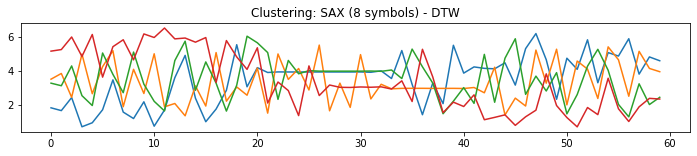

In [40]:
plt.figure(figsize=(12,2))
plt.title('Clustering: SAX (8 symbols) - DTW')
plt.plot(np.squeeze(km.cluster_centers_).T)
plt.show()

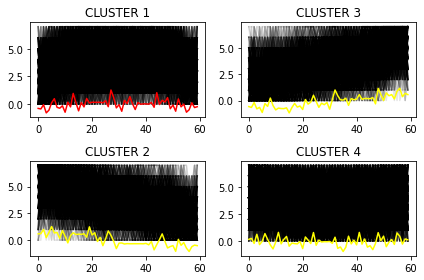

<Figure size 360x72 with 0 Axes>

<Figure size 360x72 with 0 Axes>

<Figure size 360x72 with 0 Axes>

<Figure size 360x72 with 0 Axes>

In [64]:
fig, ax = plt.subplots(2, 2)

plt.figure(figsize=(5,1))
ax[0, 0].set_title('CLUSTER 1')
ax[0, 0].plot(np.squeeze(df_sax[km.labels_ == 0]).T,color='black', alpha=0.2)
ax[0, 0].plot(np.squeeze(km.cluster_centers_[0]).T, color='red')
#plt.ylim(-0.3,0.3)

plt.figure(figsize=(5,1))
ax[1, 0].set_title('CLUSTER 2')
ax[1, 0].plot(np.squeeze(df_sax[km.labels_ == 1]).T,color='black', alpha=0.2)
ax[1, 0].plot(np.squeeze(km.cluster_centers_[1]).T, color='yellow')

#plt.ylim(-0.3,0.3)

plt.figure(figsize=(5,1))
ax[0, 1].set_title('CLUSTER 3')
ax[0, 1].plot(np.squeeze(df_sax[km.labels_ == 2]).T,color='black', alpha=0.2)
ax[0, 1].plot(np.squeeze(km.cluster_centers_[2]).T, color='yellow')
#plt.ylim(-0.3,0.3)

plt.figure(figsize=(5,1))
ax[1, 1].set_title('CLUSTER 4')
ax[1, 1].plot(np.squeeze(df_sax[km.labels_ == 3]).T,color='black', alpha=0.2)
ax[1, 1].plot(np.squeeze(km.cluster_centers_[3]).T, color='yellow')
#plt.ylim(-0.3,0.3)

fig.tight_layout()
plt.show()

In [42]:
for i in range(4):
    print("Cluster {}: {}".format(i, sum(km.labels_ == i)))

Cluster 0: 757
Cluster 1: 1590
Cluster 2: 1143
Cluster 3: 504


In [43]:
print('SSE:',km.inertia_,"\nSilouhette:",silhouette_score(df_sax, km.labels_))

SSE: 70.53579995311337 
Silouhette: 0.032222048894540896


In [44]:
for i in range(4):
    print('Cluster',i,'\n\n',df[km.labels_ == i]['genre_top'].value_counts(normalize=True),'\n\n')

Cluster 0 

 Rock            0.354029
Experimental    0.290621
Electronic      0.231176
Hip-Hop         0.124174
Name: genre_top, dtype: float64 


Cluster 1 

 Hip-Hop         0.359119
Electronic      0.250314
Experimental    0.201887
Rock            0.188679
Name: genre_top, dtype: float64 


Cluster 2 

 Experimental    0.259843
Rock            0.252843
Electronic      0.252843
Hip-Hop         0.234471
Name: genre_top, dtype: float64 


Cluster 3 

 Experimental    0.319444
Rock            0.281746
Electronic      0.271825
Hip-Hop         0.126984
Name: genre_top, dtype: float64 




# PAA - Euclidean

In [33]:
# PAA transform 
n_paa_segments = 60
paa = PiecewiseAggregateApproximation(n_segments=n_paa_segments)
ts_paa = paa.fit_transform(norm_df)
#ts_paa = paa.inverse_transform(ts_paa)
ts_paa = ts_paa.squeeze()
df_paa = pd.DataFrame(ts_paa, index=df.index)

In [34]:
km = TimeSeriesKMeans(n_clusters=4, metric="euclidean", max_iter=100, random_state=42)
km.fit(df_paa)

TimeSeriesKMeans(max_iter=100, n_clusters=4, random_state=42)

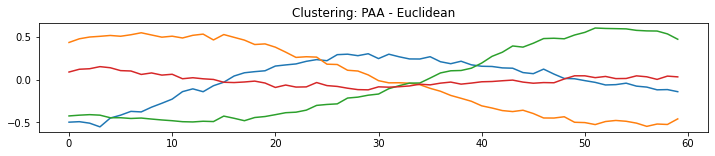

In [35]:
plt.figure(figsize=(12,2))
plt.title('Clustering: PAA - Euclidean')
plt.plot(np.squeeze(km.cluster_centers_).T)
plt.show()

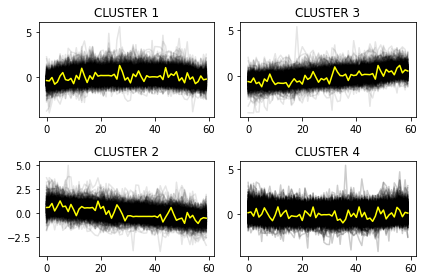

<Figure size 360x72 with 0 Axes>

<Figure size 360x72 with 0 Axes>

<Figure size 360x72 with 0 Axes>

<Figure size 360x72 with 0 Axes>

In [65]:
fig, ax = plt.subplots(2, 2)

plt.figure(figsize=(5,1))
ax[0, 0].set_title('CLUSTER 1')
ax[0, 0].plot(np.squeeze(df_paa[km.labels_ == 0]).T,color='black', alpha=0.2)
ax[0, 0].plot(np.squeeze(km.cluster_centers_[0]).T, color='yellow')
#plt.ylim(-0.3,0.3)

plt.figure(figsize=(5,1))
ax[1, 0].set_title('CLUSTER 2')
ax[1, 0].plot(np.squeeze(df_paa[km.labels_ == 1]).T,color='black', alpha=0.2)
ax[1, 0].plot(np.squeeze(km.cluster_centers_[1]).T, color='yellow')

#plt.ylim(-0.3,0.3)

plt.figure(figsize=(5,1))
ax[0, 1].set_title('CLUSTER 3')
ax[0, 1].plot(np.squeeze(df_paa[km.labels_ == 2]).T,color='black', alpha=0.2)
ax[0, 1].plot(np.squeeze(km.cluster_centers_[2]).T, color='yellow')
#plt.ylim(-0.3,0.3)

plt.figure(figsize=(5,1))
ax[1, 1].set_title('CLUSTER 4')
ax[1, 1].plot(np.squeeze(df_paa[km.labels_ == 3]).T,color='black', alpha=0.2)
ax[1, 1].plot(np.squeeze(km.cluster_centers_[3]).T, color='yellow')
#plt.ylim(-0.3,0.3)

fig.tight_layout()
plt.show()

In [37]:
for i in range(4):
    print("Cluster {}: {}".format(i, sum(km.labels_ == i)))

Cluster 0: 789
Cluster 1: 680
Cluster 2: 626
Cluster 3: 1899


In [38]:
print('SSE:',km.inertia_,"\nSilouhette:",silhouette_score(df_paa, km.labels_))

SSE: 24.97047193322677 
Silouhette: 0.051325281199446224


In [39]:
for i in range(4):
    print('Cluster',i,'\n\n',df[km.labels_ == i]['genre_top'].value_counts(normalize=True),'\n\n')

Cluster 0 

 Experimental    0.272497
Rock            0.249683
Electronic      0.247148
Hip-Hop         0.230672
Name: genre_top, dtype: float64 


Cluster 1 

 Experimental    0.300000
Rock            0.275000
Electronic      0.269118
Hip-Hop         0.155882
Name: genre_top, dtype: float64 


Cluster 2 

 Rock            0.341853
Experimental    0.279553
Electronic      0.246006
Hip-Hop         0.132588
Name: genre_top, dtype: float64 


Cluster 3 

 Hip-Hop         0.329647
Electronic      0.245919
Experimental    0.213270
Rock            0.211164
Name: genre_top, dtype: float64 




# PAA - DTW (soft)

In [40]:
km = TimeSeriesKMeans(n_clusters=4, metric="softdtw", metric_params= {"gamma": .01}, max_iter=5, random_state=42)
km.fit(df_paa)

TimeSeriesKMeans(max_iter=5, metric='softdtw', metric_params={'gamma': 0.01},
                 n_clusters=4, random_state=42)

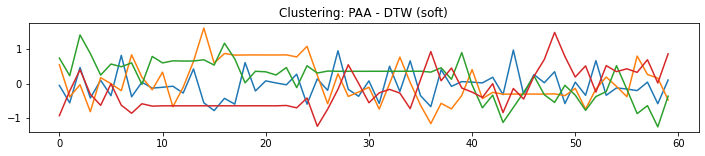

In [41]:
plt.figure(figsize=(12,2))
plt.title('Clustering: PAA - DTW (soft)')
plt.plot(np.squeeze(km.cluster_centers_).T)
plt.show()

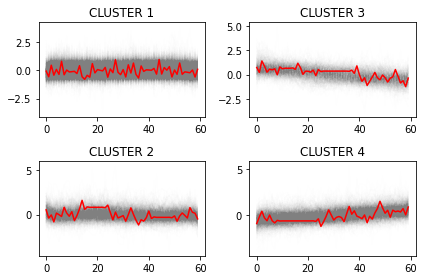

<Figure size 360x72 with 0 Axes>

<Figure size 360x72 with 0 Axes>

<Figure size 360x72 with 0 Axes>

<Figure size 360x72 with 0 Axes>

In [42]:
fig, ax = plt.subplots(2, 2)

plt.figure(figsize=(5,1))
ax[0, 0].set_title('CLUSTER 1')
ax[0, 0].plot(np.squeeze(df_paa[km.labels_ == 0]).T,color='grey', alpha=0.004)
ax[0, 0].plot(np.squeeze(km.cluster_centers_[0]).T, color='red')
#plt.ylim(-0.3,0.3)

plt.figure(figsize=(5,1))
ax[1, 0].set_title('CLUSTER 2')
ax[1, 0].plot(np.squeeze(df_paa[km.labels_ == 1]).T,color='grey', alpha=0.004)
ax[1, 0].plot(np.squeeze(km.cluster_centers_[1]).T, color='red')

#plt.ylim(-0.3,0.3)

plt.figure(figsize=(5,1))
ax[0, 1].set_title('CLUSTER 3')
ax[0, 1].plot(np.squeeze(df_paa[km.labels_ == 2]).T,color='grey', alpha=0.004)
ax[0, 1].plot(np.squeeze(km.cluster_centers_[2]).T, color='red')
#plt.ylim(-0.3,0.3)

plt.figure(figsize=(5,1))
ax[1, 1].set_title('CLUSTER 4')
ax[1, 1].plot(np.squeeze(df_paa[km.labels_ == 3]).T,color='grey', alpha=0.004)
ax[1, 1].plot(np.squeeze(km.cluster_centers_[3]).T, color='red')
#plt.ylim(-0.3,0.3)

fig.tight_layout()
plt.show()

In [43]:
for i in range(4):
    print("Cluster {}: {}".format(i, sum(km.labels_ == i)))

Cluster 0: 1730
Cluster 1: 776
Cluster 2: 566
Cluster 3: 922


In [44]:
print('SSE:',km.inertia_,"\nSilouhette:",silhouette_score(df_paa, km.labels_))

SSE: 106.6618828890421 
Silouhette: 0.028197739913876495


In [45]:
for i in range(4):
    print('Cluster',i,'\n\n',df[km.labels_ == i]['genre_top'].value_counts(normalize=True),'\n\n')

Cluster 0 

 Hip-Hop         0.406936
Electronic      0.261850
Experimental    0.171676
Rock            0.159538
Name: genre_top, dtype: float64 


Cluster 1 

 Experimental    0.354381
Rock            0.282216
Electronic      0.215206
Hip-Hop         0.148196
Name: genre_top, dtype: float64 


Cluster 2 

 Rock            0.309187
Experimental    0.279152
Electronic      0.270318
Hip-Hop         0.141343
Name: genre_top, dtype: float64 


Cluster 3 

 Rock            0.356833
Experimental    0.291757
Electronic      0.245119
Hip-Hop         0.106291
Name: genre_top, dtype: float64 




# PAA - DTW

In [47]:
km = TimeSeriesKMeans(n_clusters=4, metric="dtw", metric_params= {"global_constraint":"itakura"}, max_iter=100, random_state=42)
km.fit(df_paa)

TimeSeriesKMeans(max_iter=100, metric='dtw',
                 metric_params={'global_constraint': 'itakura'}, n_clusters=4,
                 random_state=42)

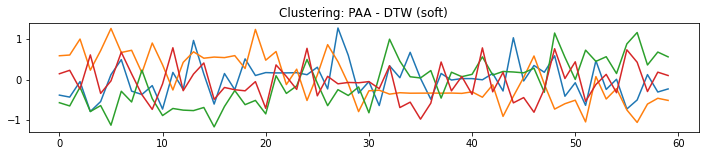

In [48]:
plt.figure(figsize=(12,2))
plt.title('Clustering: PAA - DTW (soft)')
plt.plot(np.squeeze(km.cluster_centers_).T)
plt.show()

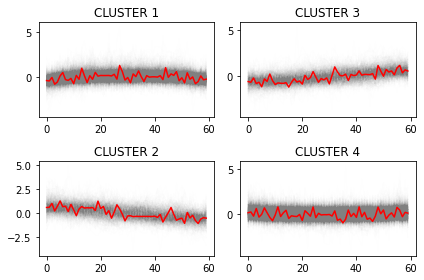

<Figure size 360x72 with 0 Axes>

<Figure size 360x72 with 0 Axes>

<Figure size 360x72 with 0 Axes>

<Figure size 360x72 with 0 Axes>

In [49]:
fig, ax = plt.subplots(2, 2)

plt.figure(figsize=(5,1))
ax[0, 0].set_title('CLUSTER 1')
ax[0, 0].plot(np.squeeze(df_paa[km.labels_ == 0]).T,color='grey', alpha=0.004)
ax[0, 0].plot(np.squeeze(km.cluster_centers_[0]).T, color='red')
#plt.ylim(-0.3,0.3)

plt.figure(figsize=(5,1))
ax[1, 0].set_title('CLUSTER 2')
ax[1, 0].plot(np.squeeze(df_paa[km.labels_ == 1]).T,color='grey', alpha=0.004)
ax[1, 0].plot(np.squeeze(km.cluster_centers_[1]).T, color='red')

#plt.ylim(-0.3,0.3)

plt.figure(figsize=(5,1))
ax[0, 1].set_title('CLUSTER 3')
ax[0, 1].plot(np.squeeze(df_paa[km.labels_ == 2]).T,color='grey', alpha=0.004)
ax[0, 1].plot(np.squeeze(km.cluster_centers_[2]).T, color='red')
#plt.ylim(-0.3,0.3)

plt.figure(figsize=(5,1))
ax[1, 1].set_title('CLUSTER 4')
ax[1, 1].plot(np.squeeze(df_paa[km.labels_ == 3]).T,color='grey', alpha=0.004)
ax[1, 1].plot(np.squeeze(km.cluster_centers_[3]).T, color='red')
#plt.ylim(-0.3,0.3)

fig.tight_layout()
plt.show()

In [50]:
for i in range(4):
    print("Cluster {}: {}".format(i, sum(km.labels_ == i)))

Cluster 0: 1088
Cluster 1: 632
Cluster 2: 644
Cluster 3: 1630


In [51]:
print('SSE:',km.inertia_,"\nSilouhette:",silhouette_score(df_paa, km.labels_))

SSE: 11.21972316829749 
Silouhette: 0.0354337093579793


In [52]:
for i in range(4):
    print('Cluster',i,'\n\n',df[km.labels_ == i]['genre_top'].value_counts(normalize=True),'\n\n')

Cluster 0 

 Experimental    0.258272
Hip-Hop         0.256434
Electronic      0.252757
Rock            0.232537
Name: genre_top, dtype: float64 


Cluster 1 

 Experimental    0.316456
Rock            0.284810
Electronic      0.276899
Hip-Hop         0.121835
Name: genre_top, dtype: float64 


Cluster 2 

 Rock            0.374224
Experimental    0.267081
Electronic      0.237578
Hip-Hop         0.121118
Name: genre_top, dtype: float64 


Cluster 3 

 Hip-Hop         0.345399
Electronic      0.242945
Experimental    0.212270
Rock            0.199387
Name: genre_top, dtype: float64 




# RAW TS - Euclidean

In [49]:
km = TimeSeriesKMeans(n_clusters=4, metric="euclidean", max_iter=5, random_state=42)
km.fit(norm_df)

TimeSeriesKMeans(max_iter=5, n_clusters=4, random_state=42)

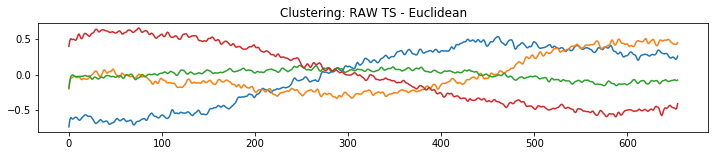

In [50]:
plt.figure(figsize=(12,2))
plt.title('Clustering: RAW TS - Euclidean')
plt.plot(np.squeeze(km.cluster_centers_).T)
plt.show()

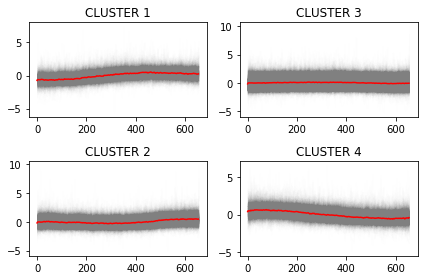

<Figure size 360x72 with 0 Axes>

<Figure size 360x72 with 0 Axes>

<Figure size 360x72 with 0 Axes>

<Figure size 360x72 with 0 Axes>

In [51]:
fig, ax = plt.subplots(2, 2)

plt.figure(figsize=(5,1))
ax[0, 0].set_title('CLUSTER 1')
ax[0, 0].plot(np.squeeze(norm_df[km.labels_ == 0]).T,color='grey', alpha=0.004)
ax[0, 0].plot(np.squeeze(km.cluster_centers_[0]).T, color='red')
#plt.ylim(-0.3,0.3)

plt.figure(figsize=(5,1))
ax[1, 0].set_title('CLUSTER 2')
ax[1, 0].plot(np.squeeze(norm_df[km.labels_ == 1]).T,color='grey', alpha=0.004)
ax[1, 0].plot(np.squeeze(km.cluster_centers_[1]).T, color='red')

#plt.ylim(-0.3,0.3)

plt.figure(figsize=(5,1))
ax[0, 1].set_title('CLUSTER 3')
ax[0, 1].plot(np.squeeze(norm_df[km.labels_ == 2]).T,color='grey', alpha=0.004)
ax[0, 1].plot(np.squeeze(km.cluster_centers_[2]).T, color='red')
#plt.ylim(-0.3,0.3)

plt.figure(figsize=(5,1))
ax[1, 1].set_title('CLUSTER 4')
ax[1, 1].plot(np.squeeze(norm_df[km.labels_ == 3]).T,color='grey', alpha=0.004)
ax[1, 1].plot(np.squeeze(km.cluster_centers_[3]).T, color='red')
#plt.ylim(-0.3,0.3)

fig.tight_layout()
plt.show()

In [52]:
for i in range(4):
    print("Cluster {}: {}".format(i, sum(km.labels_ == i)))

Cluster 0: 561
Cluster 1: 808
Cluster 2: 1994
Cluster 3: 631


In [53]:
print('SSE:',km.inertia_,"\nSilouhette:",silhouette_score(norm_df, km.labels_))

SSE: 490.6784739858507 
Silouhette: 0.025274729034096


In [54]:
for i in range(4):
    print('Cluster',i,'\n\n',df[km.labels_ == i]['genre_top'].value_counts(normalize=True),'\n\n')

Cluster 0 

 Rock            0.347594
Experimental    0.272727
Electronic      0.240642
Hip-Hop         0.139037
Name: genre_top, dtype: float64 


Cluster 1 

 Experimental    0.288366
Rock            0.273515
Electronic      0.233911
Hip-Hop         0.204208
Name: genre_top, dtype: float64 


Cluster 2 

 Hip-Hop         0.336510
Electronic      0.253260
Experimental    0.208124
Rock            0.202106
Name: genre_top, dtype: float64 


Cluster 3 

 Experimental    0.313788
Rock            0.285261
Electronic      0.269414
Hip-Hop         0.131537
Name: genre_top, dtype: float64 


